Saving cameraman.bmp to cameraman.bmp
Saving cat_bw.bmp to cat_bw.bmp
Saving circles.bmp to circles.bmp


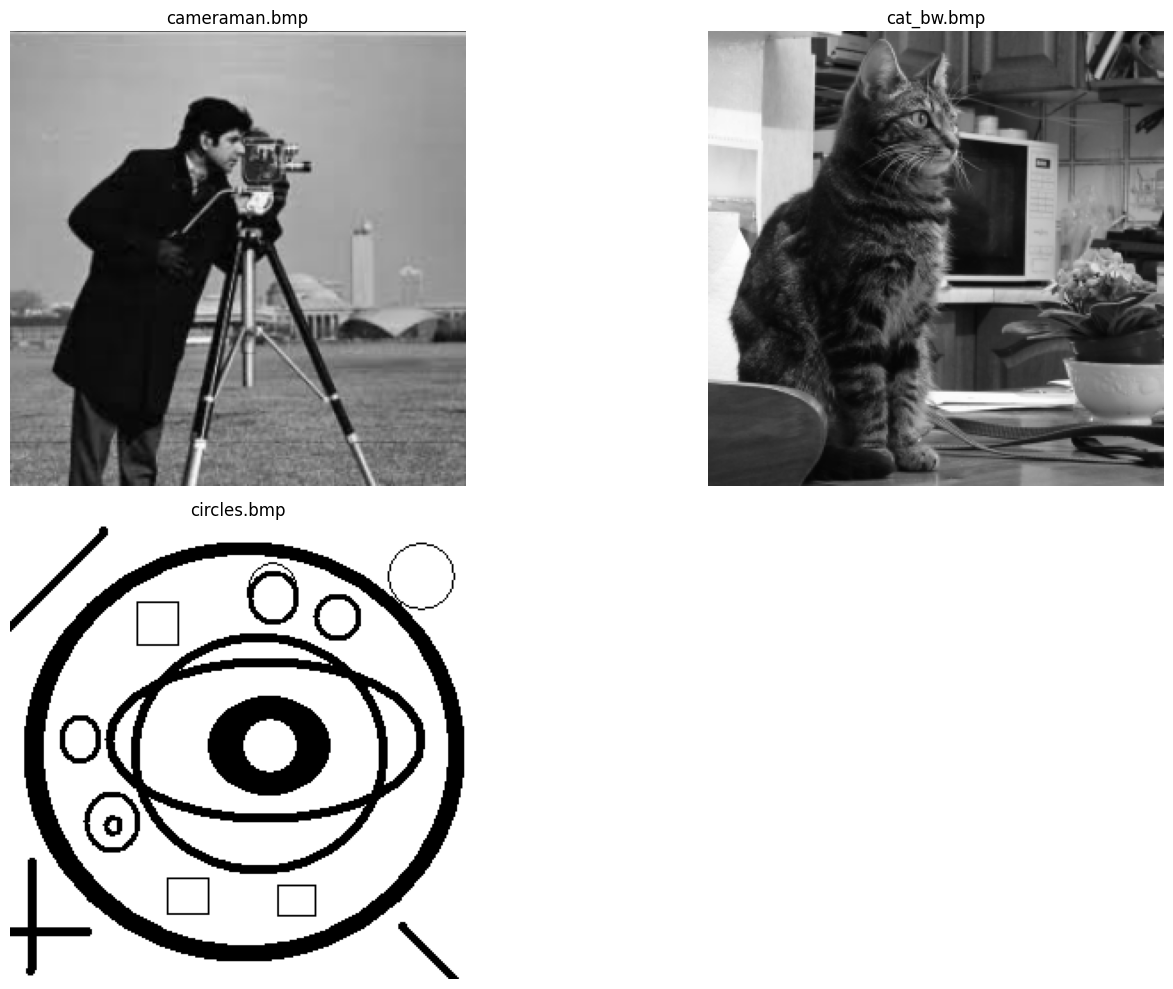

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()

images = {}
for filename in uploaded.keys():
    img = cv2.imread(filename)
    if img is not None:

        images[filename] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        print(f"خطا در خواندن فایل {filename}")

plt.figure(figsize=(15, 10))
for i, (filename, img) in enumerate(images.items(), 1):
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

def convert_to_bmp(input_path, output_path):
    try:
        img = Image.open(input_path)
        img.save(output_path, format='BMP')
        print(f"✅ file'{input_path}' BMP Transformed")
    except Exception as e:
        print(f"❌ خطا در تبدیل: {str(e)}")

convert_to_bmp('lena.bmp', 'lena_converted.bmp')

✅ file'lena.bmp' BMP Transformed


# **الف :تابع دستی**


Processing cameraman.bmp...
ℹ️ 256x256, 24bpp
✅ cameraman.bmp processed and saved as /content/cameraman_converted.jpg

Processing cat_bw.bmp...
ℹ️ 256x256, 8bpp
✅ cat_bw.bmp processed and saved as /content/cat_bw_converted.jpg

Processing circles.bmp...
ℹ️ 256x256, 8bpp
✅ circles.bmp processed and saved as /content/circles_converted.jpg

Processing lena_converted.bmp...
ℹ️ 174x130, 24bpp
✅ lena_converted.bmp processed and saved as /content/lena_converted_converted.jpg


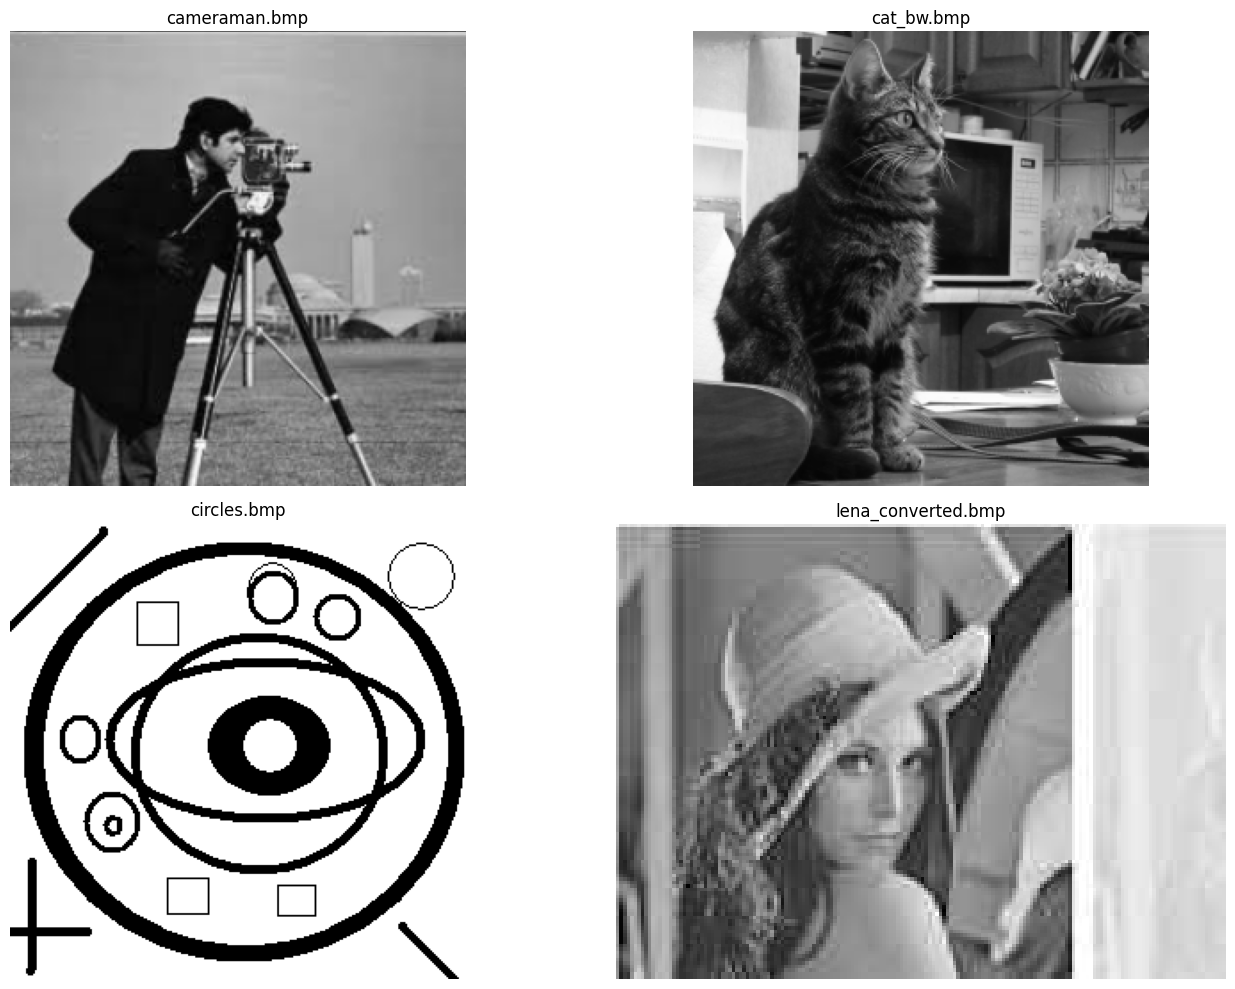

In [ ]:
import struct
import os
import matplotlib.pyplot as plt
from PIL import Image

def manual_process_images(image_files, base_path='/content'):
    images = {}

    for filename in image_files:
        file_path = os.path.join(base_path, filename)
        print(f"\nProcessing {filename}...")

        if not os.path.exists(file_path):
            print(f"❌ File {filename} not found!")
            continue

        try:
            with open(file_path, 'rb') as f:
                header = f.read(2)
                if header != b'BM':
                    print(f"⚠️ {filename} is not a BMP file, trying to open with PIL...")
                    try:
                        img = Image.open(file_path).convert('RGB')
                        pixels = list(img.getdata())
                        width, height = img.size
                        pixels = [pixels[i*width:(i+1)*width] for i in range(height)]
                        images[filename] = pixels


                        jpg_path = os.path.splitext(file_path)[0] + '_converted.jpg'
                        img.save(jpg_path, 'JPEG', quality=95)
                        print(f"✅ Converted {filename} to {jpg_path} using PIL")
                        continue
                    except Exception as e:
                        print(f"❌ Failed to process {filename} with PIL: {e}")
                        continue


            with open(file_path, 'rb') as f:
                header = f.read(54)
                if len(header) < 54:
                    raise ValueError("Invalid BMP header size")


                width = struct.unpack('<I', header[18:22])[0]
                height = struct.unpack('<I', header[22:26])[0]
                bits_per_pixel = struct.unpack('<H', header[28:30])[0]
                pixel_offset = struct.unpack('<I', header[10:14])[0]

                print(f"ℹ️ {width}x{height}, {bits_per_pixel}bpp")

                # Support both 8-bit and 24-bit BMP
                if bits_per_pixel == 8:

                    f.seek(54)
                    palette = [struct.unpack('<BBBx', f.read(4)) for _ in range(256)]


                    f.seek(pixel_offset)
                    row_size = width
                    row_padding = (4 - row_size % 4) % 4
                    pixels = []
                    for _ in range(height):
                        row = []
                        row_data = f.read(row_size)
                        for byte in row_data:
                            row.append(palette[byte])
                        f.read(row_padding)
                        pixels.insert(0, row) 

                elif bits_per_pixel == 24:

                    f.seek(pixel_offset)
                    row_size = width * 3
                    row_padding = (4 - row_size % 4) % 4
                    pixels = []
                    for _ in range(height):
                        row = []
                        row_data = f.read(row_size)
                        for i in range(width):
                            offset = i * 3
                            b, g, r = row_data[offset:offset+3]
                            row.append((r, g, b))
                        f.read(row_padding)
                        pixels.insert(0, row)  
                else:
                    raise ValueError(f"Unsupported bit depth: {bits_per_pixel}")

                images[filename] = pixels


                jpg_path = os.path.splitext(file_path)[0] + '_converted.jpg'
                save_as_jpeg(jpg_path, pixels, width, height)
                print(f"✅ {filename} processed and saved as {jpg_path}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")


    if images:
        plt.figure(figsize=(15, 10))
        for i, (filename, pixels) in enumerate(images.items(), 1):
            plt.subplot(2, 2, i)
            plt.imshow(pixels)
            plt.title(filename)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

def save_as_jpeg(jpg_path, pixels, width, height):
    """Save pixel data as JPEG using PIL"""
    try:

        img = Image.new('RGB', (width, height))
        img.putdata([pixel for row in pixels for pixel in row])
        img.save(jpg_path, 'JPEG', quality=95)
    except Exception as e:
        print(f"❌ Error saving JPEG: {e}")

image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']
manual_process_images(image_files)

# **الف ) تابع آماده**

cameraman.bmp processed and saved as /content/cameraman_converted.jpg
cat_bw.bmp processed and saved as /content/cat_bw_converted.jpg
circles.bmp processed and saved as /content/circles_converted.jpg
lena.bmp processed and saved as /content/lena_converted.jpg


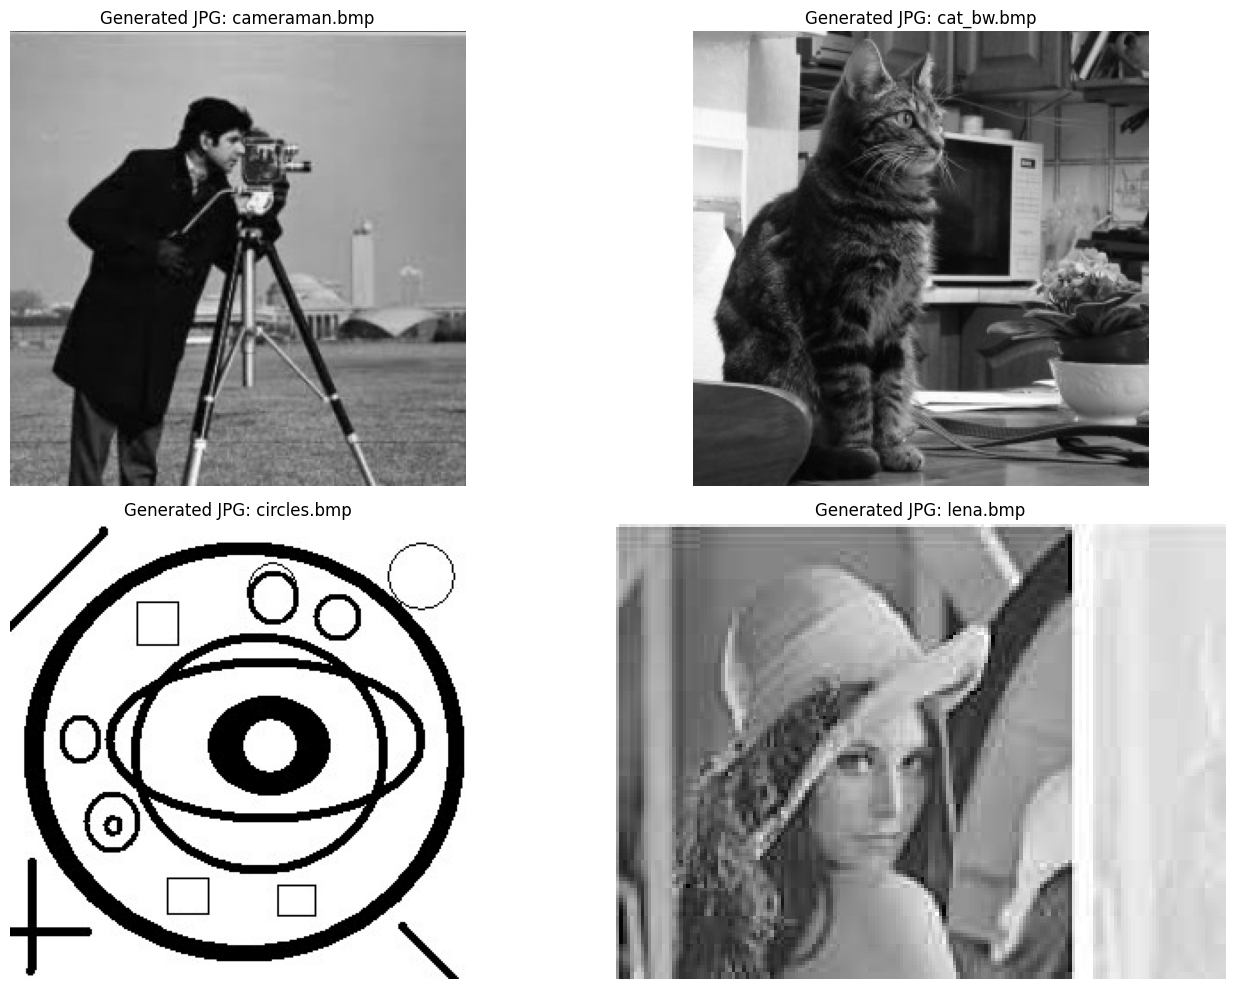

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def process_and_display_images(image_files, base_path='/content'):
    jpg_images = {}

    for filename in image_files:
        file_path = os.path.join(base_path, filename)

        if os.path.exists(file_path):
            img = cv2.imread(file_path)

            if img is not None:
                rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                jpg_path = os.path.splitext(file_path)[0] + '_converted.jpg'
                cv2.imwrite(jpg_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
                jpg_images[filename] = cv2.imread(jpg_path)  # Read the saved JPG for display
                print(f"{filename} processed and saved as {jpg_path}")
            else:
                print(f"Error reading {filename}")
        else:
            print(f"File {filename} not found!")

    if jpg_images:
        plt.figure(figsize=(15, 10))
        for i, (filename, img) in enumerate(jpg_images.items(), 1):
            plt.subplot(2, 2, i)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Generated JPG: {filename}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena.bmp']
process_and_display_images(image_files)


# **ب:تابع دستی**


Processing cameraman.bmp...
ℹ️ 256x256, 24bpp, compression=0
✅ Successfully loaded cameraman.bmp

Processing cat_bw.bmp...
ℹ️ 256x256, 8bpp, compression=0
✅ Successfully loaded cat_bw.bmp

Processing circles.bmp...
ℹ️ 256x256, 8bpp, compression=0
✅ Successfully loaded circles.bmp

Processing lena_converted.bmp...
ℹ️ 174x130, 24bpp, compression=0
✅ Successfully loaded lena_converted.bmp


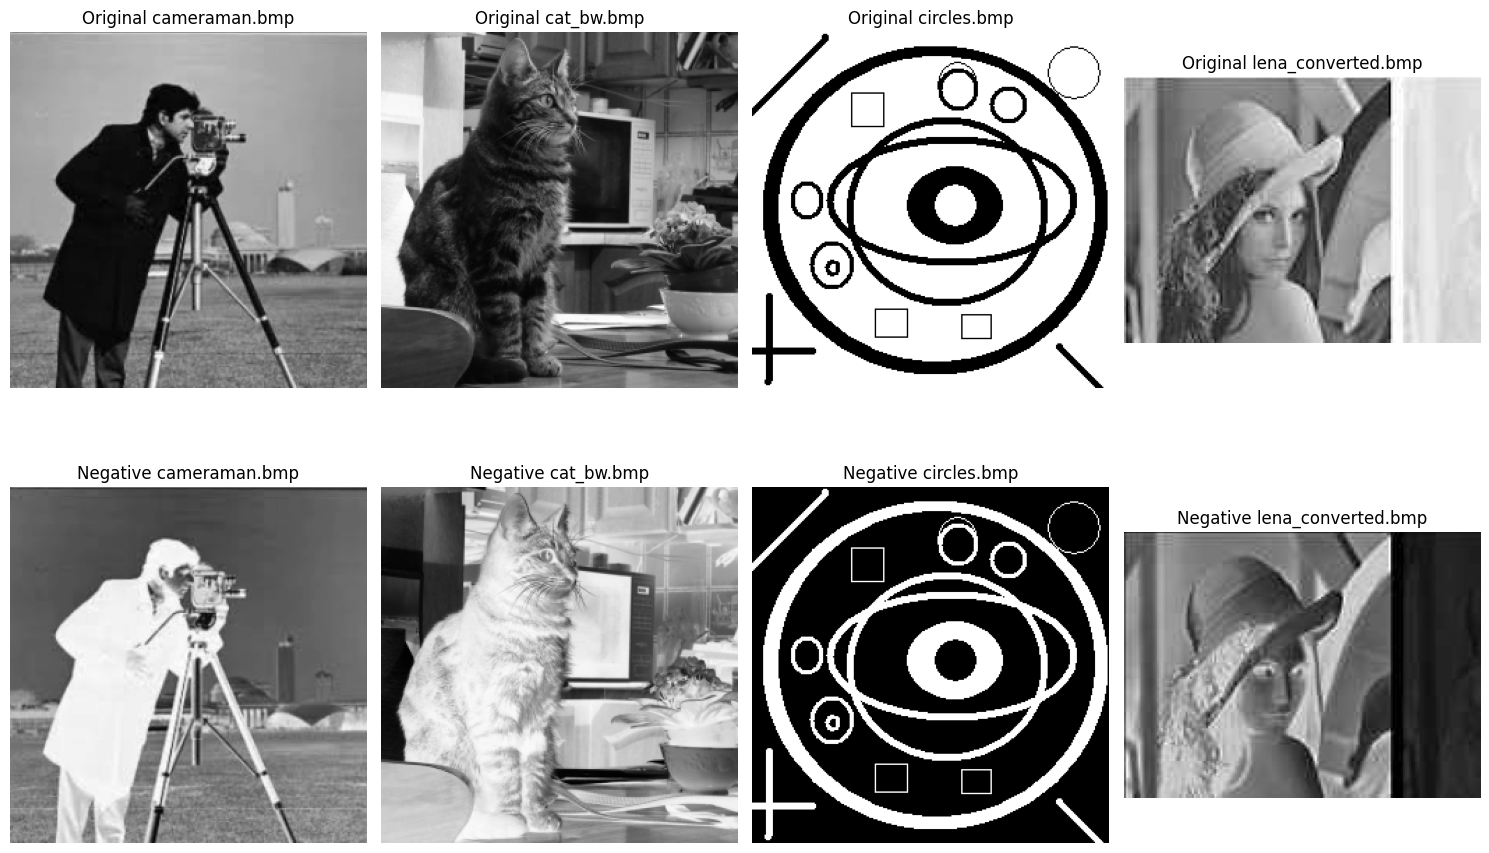

In [ ]:
import struct
import os
import matplotlib.pyplot as plt

def process_bmp_images(image_files, base_path='.'):
    images = {}

    for filename in image_files:
        file_path = os.path.join(base_path, filename)
        print(f"\nProcessing {filename}...")

        if not os.path.exists(file_path):
            print(f"❌ File not found: {filename}")
            continue

        try:
            with open(file_path, 'rb') as f:

                header = f.read(54)


                if len(header) < 54 or header[:2] != b'BM':
                    print(f"❌ Not a valid BMP file: {filename}")
                    continue

                width = struct.unpack('<I', header[18:22])[0]
                height = struct.unpack('<I', header[22:26])[0]
                bits_per_pixel = struct.unpack('<H', header[28:30])[0]
                compression = struct.unpack('<I', header[30:34])[0]
                colors_used = struct.unpack('<I', header[46:50])[0]
                pixel_offset = struct.unpack('<I', header[10:14])[0]

                print(f"ℹ️ {width}x{height}, {bits_per_pixel}bpp, compression={compression}")

                # Support both 8-bit and 24-bit
                if bits_per_pixel not in [8, 24]:
                    print(f"❌ Unsupported bit depth: {bits_per_pixel}")
                    continue

                if compression != 0:
                    print(f"❌ Only uncompressed BMP supported")
                    continue

                palette = []
                if bits_per_pixel == 8:
                    f.seek(54)
                    palette_size = colors_used if colors_used > 0 else 256
                    palette_data = f.read(palette_size * 4)
                    for i in range(palette_size):
                        offset = i * 4
                        b, g, r, _ = palette_data[offset:offset+4]
                        palette.append((r, g, b))


                f.seek(pixel_offset)
                pixels = []

                if bits_per_pixel == 24:
                    row_size = width * 3
                    row_padding = (4 - (width * 3) % 4) % 4
                    for _ in range(height):
                        row = []
                        row_data = f.read(row_size)
                        for col in range(width):
                            offset = col * 3
                            b, g, r = row_data[offset:offset+3]
                            row.append((r, g, b))
                        f.read(row_padding)
                        pixels.insert(0, row)
                else:  # 8-bit
                    row_size = width
                    row_padding = (4 - width % 4) % 4
                    for _ in range(height):
                        row = []
                        row_data = f.read(row_size)
                        for col in row_data:
                            row.append(palette[col])
                        f.read(row_padding)
                        pixels.insert(0, row)

                images[filename] = pixels
                print(f"✅ Successfully loaded {filename}")

        except Exception as e:
            print(f"❌ Error processing {filename}: {str(e)}")
            continue

    if images:
        plt.figure(figsize=(15, 10))
        for i, (filename, pixels) in enumerate(images.items(), 1):
            gray_img = [
                [int(0.299 * p[0] + 0.587 * p[1] + 0.114 * p[2])
                for p in row]
                for row in pixels
            ]


            negative_img = [[255 - p for p in row] for row in gray_img]


            plt.subplot(2, len(images), i)
            plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255)
            plt.title(f'Original {filename}')
            plt.axis('off')

            plt.subplot(2, len(images), i + len(images))
            plt.imshow(negative_img, cmap='gray', vmin=0, vmax=255)
            plt.title(f'Negative {filename}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No images were processed successfully!")


image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']
process_bmp_images(image_files)

# **ب:تابع آماده**

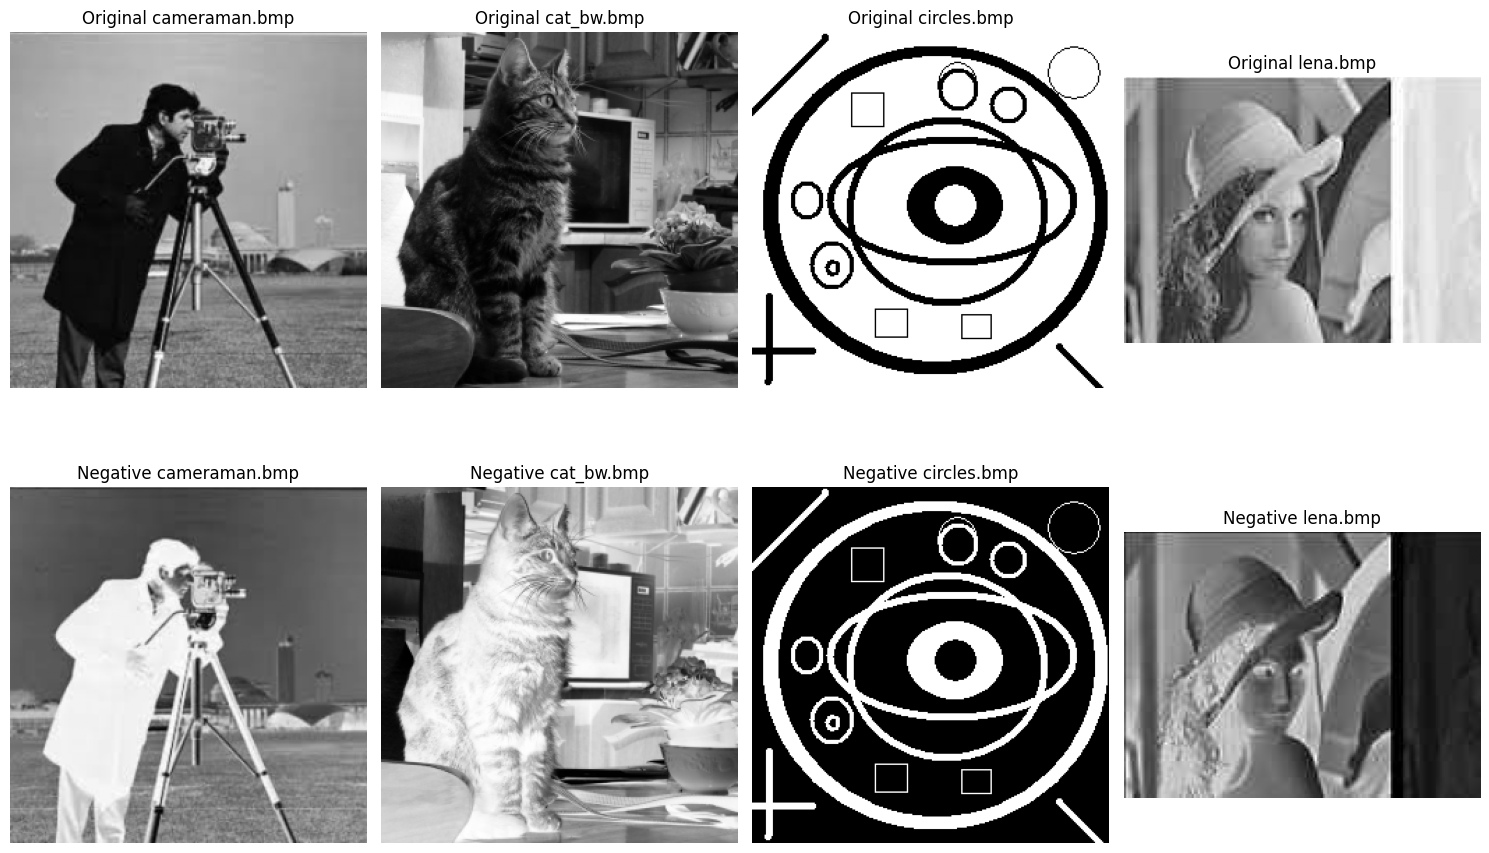

In [ ]:
plt.figure(figsize=(15, 10))
for i, (filename, img) in enumerate(images.items(), 1):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    negative_img = 255 - gray_img


    plt.subplot(2, 4, i)
    plt.imshow(gray_img, cmap='gray')
    plt.title(f'Original {filename}')
    plt.axis('off')

    plt.subplot(2, 4, i+4)
    plt.imshow(negative_img, cmap='gray')
    plt.title(f'Negative {filename}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **ج:توابع دستی**

Processing cameraman.bmp...
Total white pixels (255): 0
Total black pixels (0): 14
Processing cat_bw.bmp...
Total white pixels (255): 0
Total black pixels (0): 0
Processing circles.bmp...
Total white pixels (255): 49800
Total black pixels (0): 15736
Processing lena_converted.bmp...
Total white pixels (255): 335
Total black pixels (0): 16


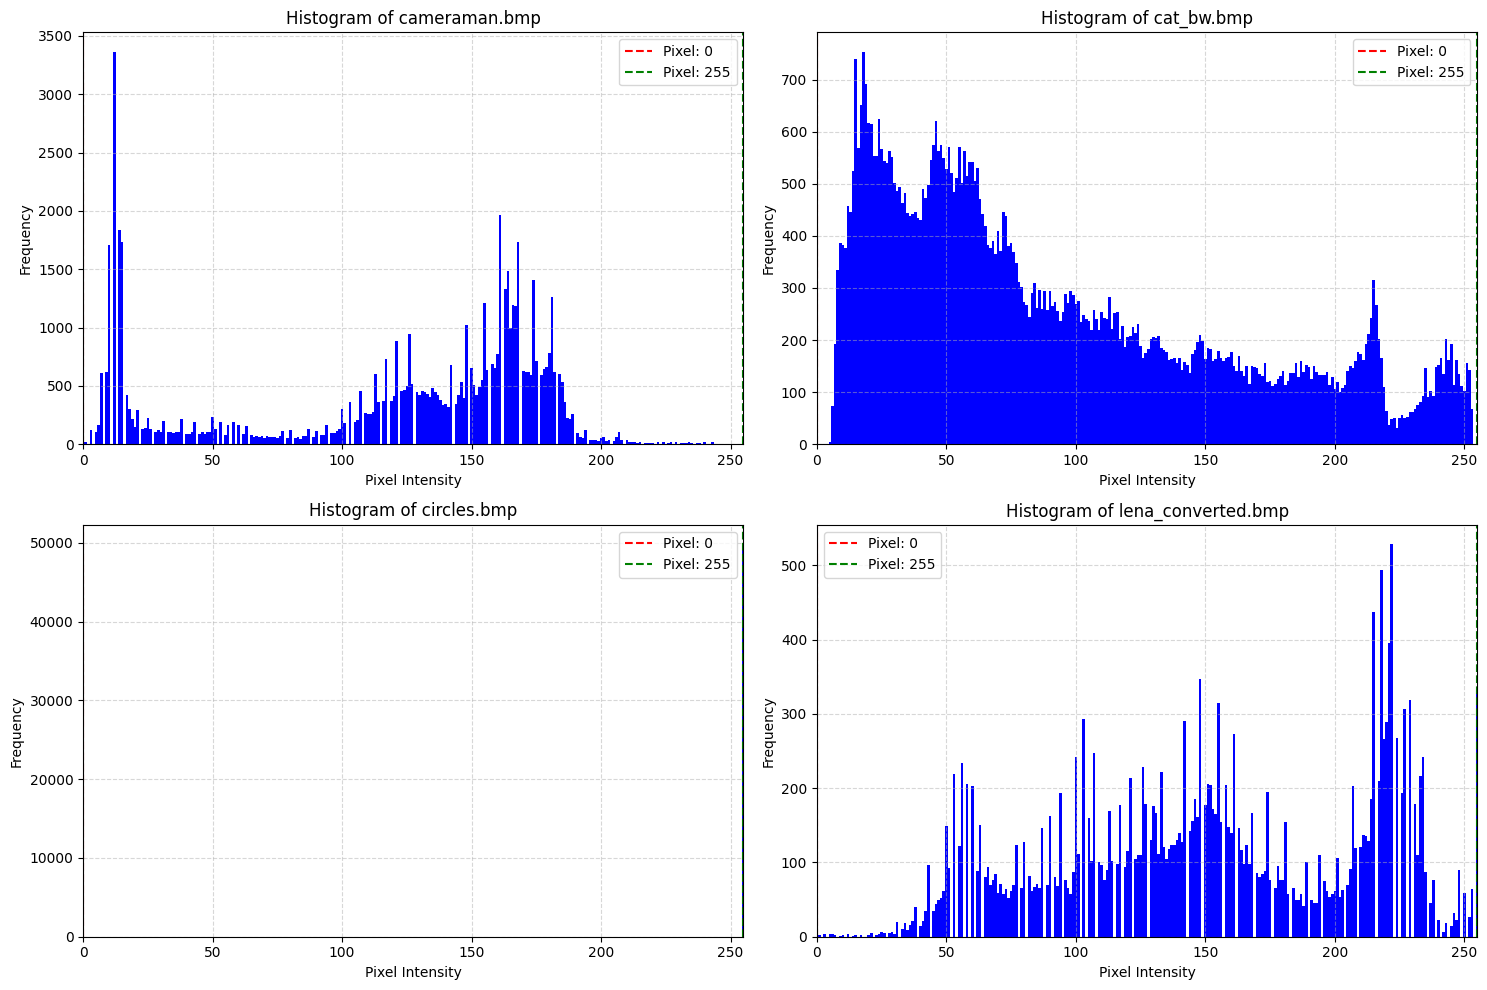

In [ ]:
import struct
import os
import matplotlib.pyplot as plt

def load_bmp_manual(filename):
    """Manually load BMP file and convert it to grayscale."""
    try:
        with open(filename, 'rb') as f:

            header = f.read(54)
            if len(header) < 54 or header[:2] != b'BM':
                raise ValueError(f"{filename} is not a valid BMP file")


            width = int.from_bytes(header[18:22], 'little')
            height = int.from_bytes(header[22:26], 'little')
            bits_per_pixel = int.from_bytes(header[28:30], 'little')
            offset = int.from_bytes(header[10:14], 'little')


            if bits_per_pixel not in [8, 24]:
                raise ValueError(f"Unsupported bit depth: {bits_per_pixel}")

            f.seek(offset)

            pixels = []
            row_padding = (4 - (width * (bits_per_pixel // 8)) % 4) % 4


            for _ in range(height):
                row = []
                row_data = f.read(width * (bits_per_pixel // 8))
                if len(row_data) < width * (bits_per_pixel // 8):
                    raise ValueError(f"Unexpected end of pixel data in {filename}")

                if bits_per_pixel == 24:
                    # Convert 24-bit BMP to grayscale
                    for col in range(width):
                        b, g, r = row_data[col * 3:(col * 3) + 3]
                        gray = int(0.299 * r + 0.587 * g + 0.114 * b)
                        row.append(gray)
                elif bits_per_pixel == 8:
                    # Handle 8-bit BMP
                    row.extend(row_data)
                else:
                    raise ValueError(f"Unsupported bit depth: {bits_per_pixel}")

                f.read(row_padding)

                pixels.insert(0, row)
        return pixels

    except Exception as e:
        raise ValueError(f"Error loading {filename}: {e}")

def manual_histogram(pixels):
    """Compute histogram manually."""
    hist = [0] * 256
    for row in pixels:
        for pixel in row:
            hist[pixel] += 1
    return hist

def manual_plot(hist, title):
    """Plot histogram manually using matplotlib."""
    plt.bar(range(256), hist, color='blue', width=1.0)
    plt.axvline(x=0, color='red', linestyle='--', label='Pixel: 0')
    plt.axvline(x=255, color='green', linestyle='--', label='Pixel: 255')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

def print_pixel_counts(pixels):
    """Print counts of specific pixel intensities (0 and 255)."""
    total_white = sum(row.count(255) for row in pixels)
    total_black = sum(row.count(0) for row in pixels)
    print(f"Total white pixels (255): {total_white}")
    print(f"Total black pixels (0): {total_black}")

image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']

plt.figure(figsize=(15, 10))
for i, filename in enumerate(image_files, 1):
    try:
        print(f"Processing {filename}...")
        pixels = load_bmp_manual(filename)


        print_pixel_counts(pixels)


        hist = manual_histogram(pixels)
        plt.subplot(2, 2, i)
        manual_plot(hist, f'Histogram of {filename}')

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        plt.subplot(2, 2, i)
        plt.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()


امتحان کد


In [ ]:
import cv2
import numpy as np

img = cv2.imread('circles.bmp', cv2.IMREAD_GRAYSCALE)

print("تعداد پیکسل‌های سفید (255):", np.sum(img == 255))
print("تعداد پیکسل‌های مشکی (0):", np.sum(img == 0))
print("کل پیکسل‌ها:", img.size)

تعداد پیکسل‌های سفید (255): 49800
تعداد پیکسل‌های مشکی (0): 15736
کل پیکسل‌ها: 65536


# **ج:آماده**

Processing cameraman.bmp...
Total white pixels (255): 0
Total black pixels (0): 2
Processing cat_bw.bmp...
Total white pixels (255): 0
Total black pixels (0): 0
Processing circles.bmp...
Total white pixels (255): 49800
Total black pixels (0): 15736
Processing lena_converted.bmp...
Total white pixels (255): 335
Total black pixels (0): 16


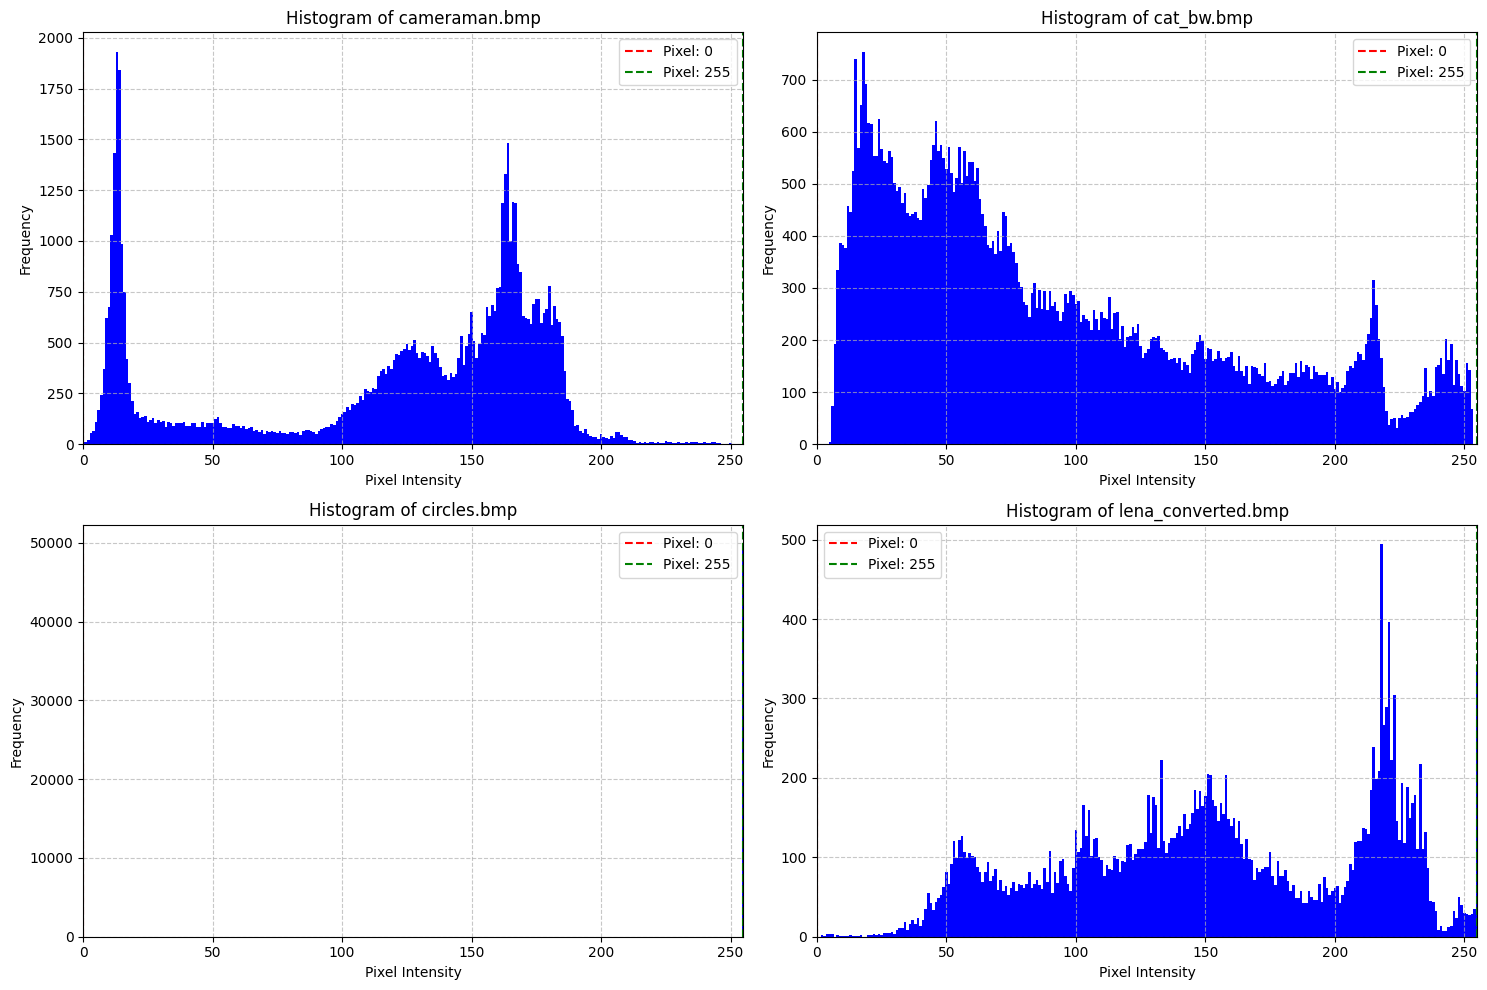

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def calculate_histogram(image_path):
    """Calculate histogram manually for grayscale image."""
    # Read the image as grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Initialize histogram
    hist = np.zeros(256, dtype=int)
    for pixel in img_array.flatten():
        hist[pixel] += 1

    return hist, img_array

def print_pixel_counts(img_array):
    """Count specific pixel intensities (0 and 255) and print."""
    total_white = np.sum(img_array == 255)
    total_black = np.sum(img_array == 0)
    print(f"Total white pixels (255): {total_white}")
    print(f"Total black pixels (0): {total_black}")

# List of images
image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']

plt.figure(figsize=(15, 10))
for i, filename in enumerate(image_files, 1):
    try:
        print(f"Processing {filename}...")
        hist, img_array = calculate_histogram(filename)

        # Print pixel counts
        print_pixel_counts(img_array)

        # Plot histogram
        plt.subplot(2, 2, i)
        plt.bar(range(256), hist, width=1.0, color='blue')
        plt.axvline(x=0, color='red', linestyle='--', label='Pixel: 0')
        plt.axvline(x=255, color='green', linestyle='--', label='Pixel: 255')
        plt.title(f'Histogram of {filename}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        plt.subplot(2, 2, i)
        plt.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()


# **د:دستی**


Processing Image: cameraman.bmp

Image Properties:
- Number of gray levels: 203
- Minimum value: 0
- Maximum value: 253

Please enter new range:
New minimum (0-254): 10
New maximum (1-255): 150

Processing Results:
- New minimum value: 10
- New maximum value: 150


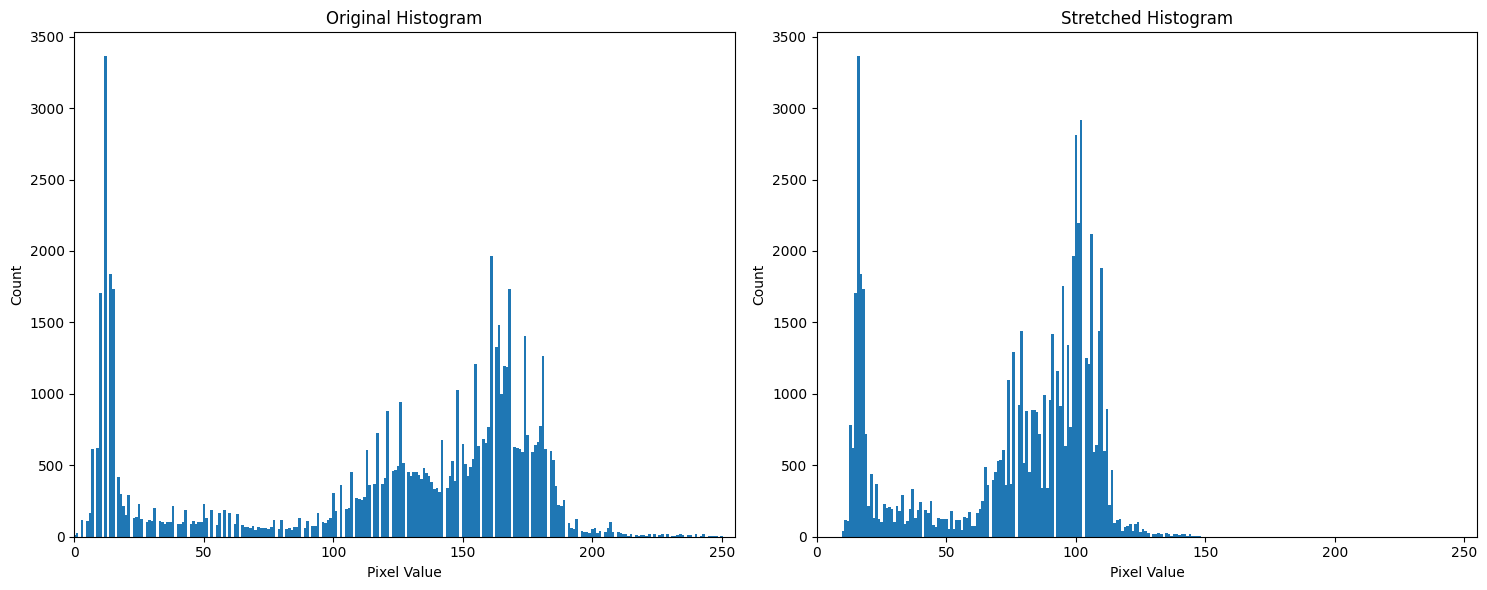

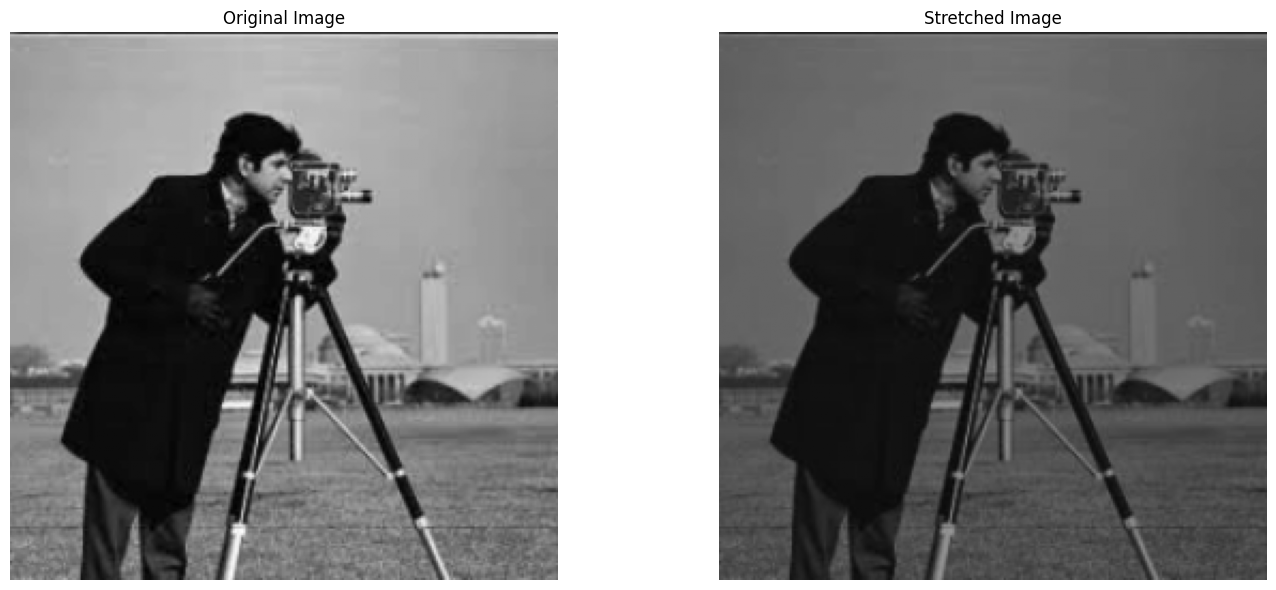

Processed image saved as stretched_cameraman.bmp

Processing Image: cat_bw.bmp

Image Properties:
- Number of gray levels: 249
- Minimum value: 5
- Maximum value: 253

Please enter new range:
New minimum (0-254): 100
New maximum (1-255): 255

Processing Results:
- New minimum value: 100
- New maximum value: 255


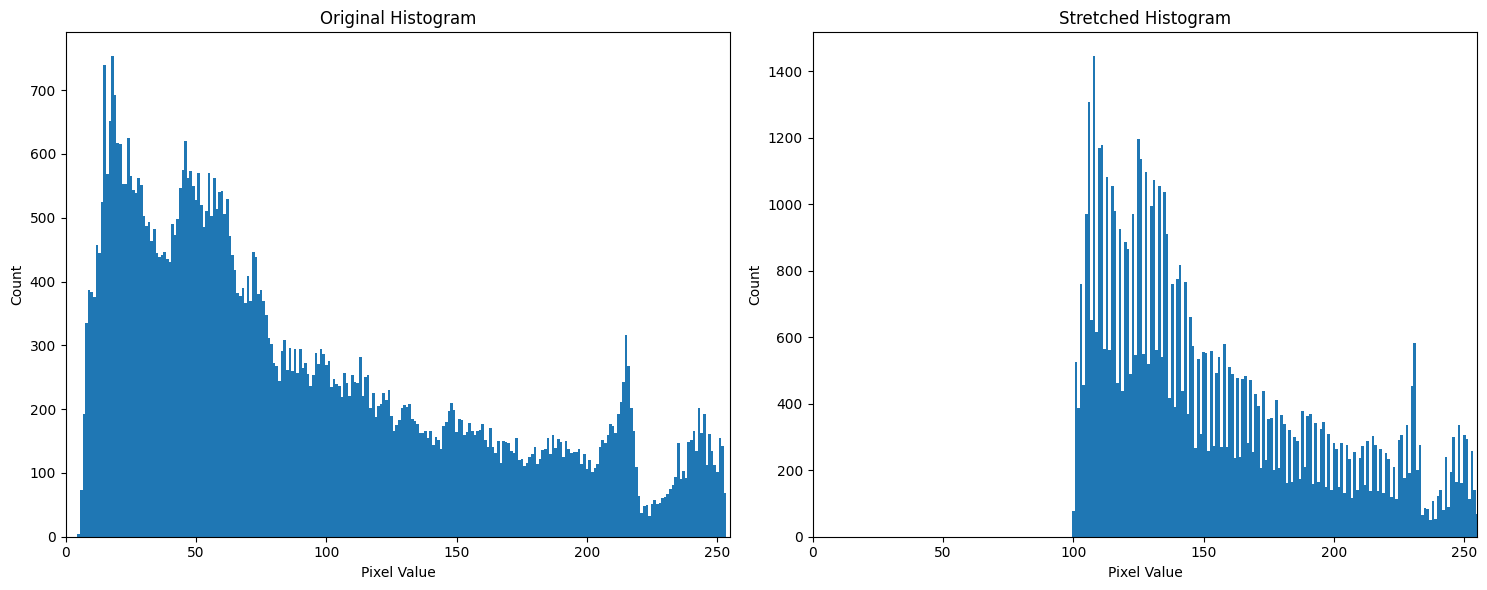

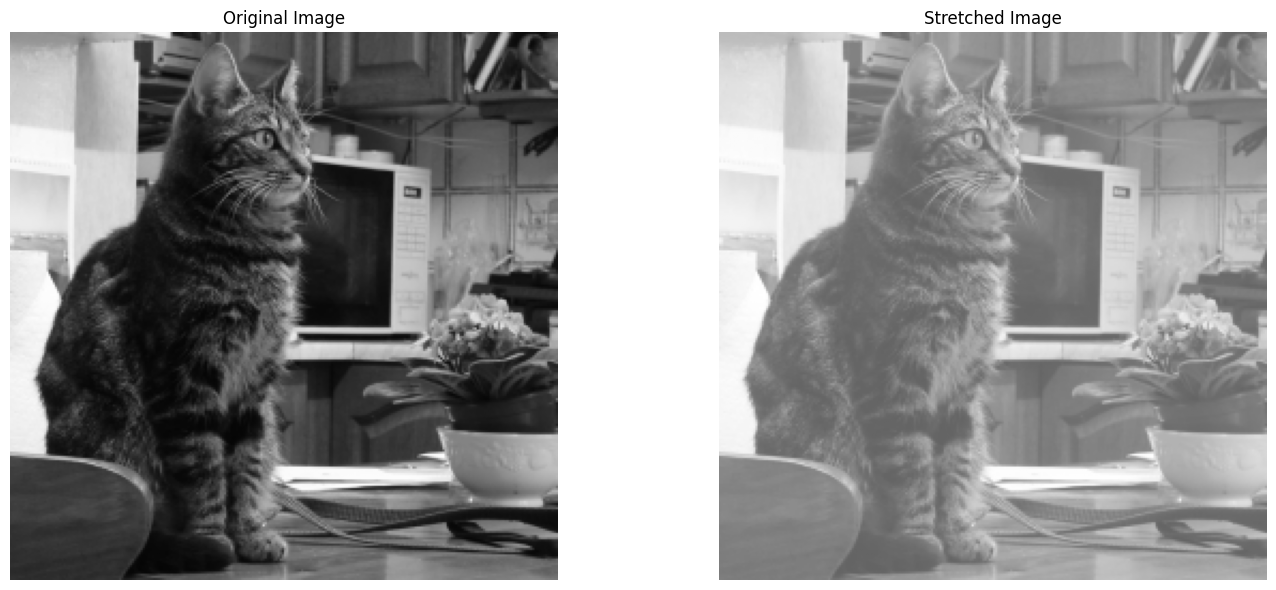

Processed image saved as stretched_cat_bw.bmp

Processing Image: circles.bmp

Image Properties:
- Number of gray levels: 2
- Minimum value: 0
- Maximum value: 255

Please enter new range:
New minimum (0-254): 50
New maximum (1-255): 200

Processing Results:
- New minimum value: 50
- New maximum value: 200


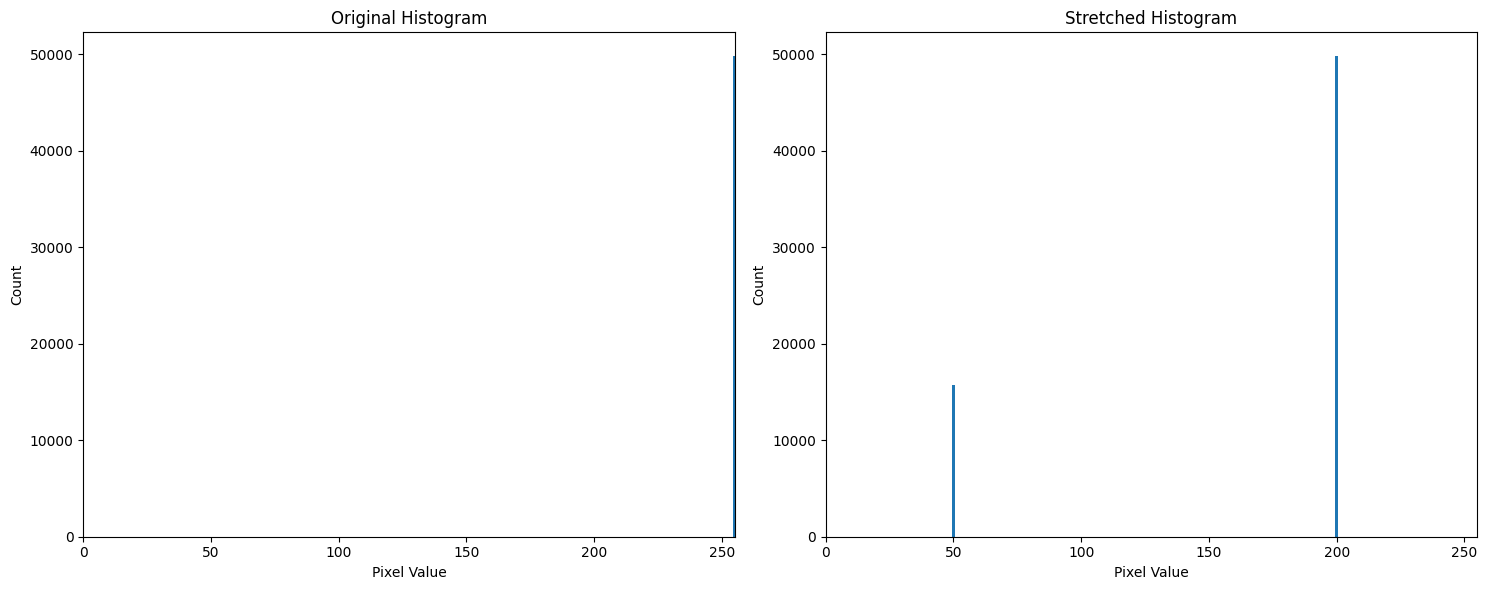

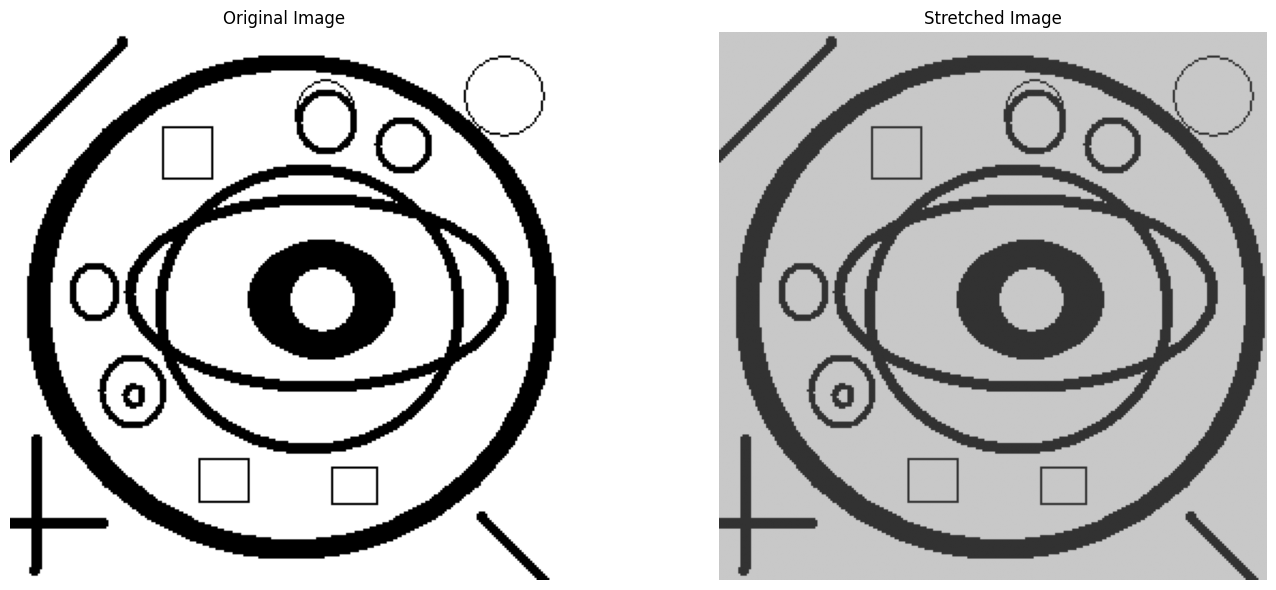

Processed image saved as stretched_circles.bmp

Processing Image: lena_converted.bmp

Image Properties:
- Number of gray levels: 202
- Minimum value: 0
- Maximum value: 255

Please enter new range:
New minimum (0-254): 200
New maximum (1-255): 255

Processing Results:
- New minimum value: 200
- New maximum value: 255


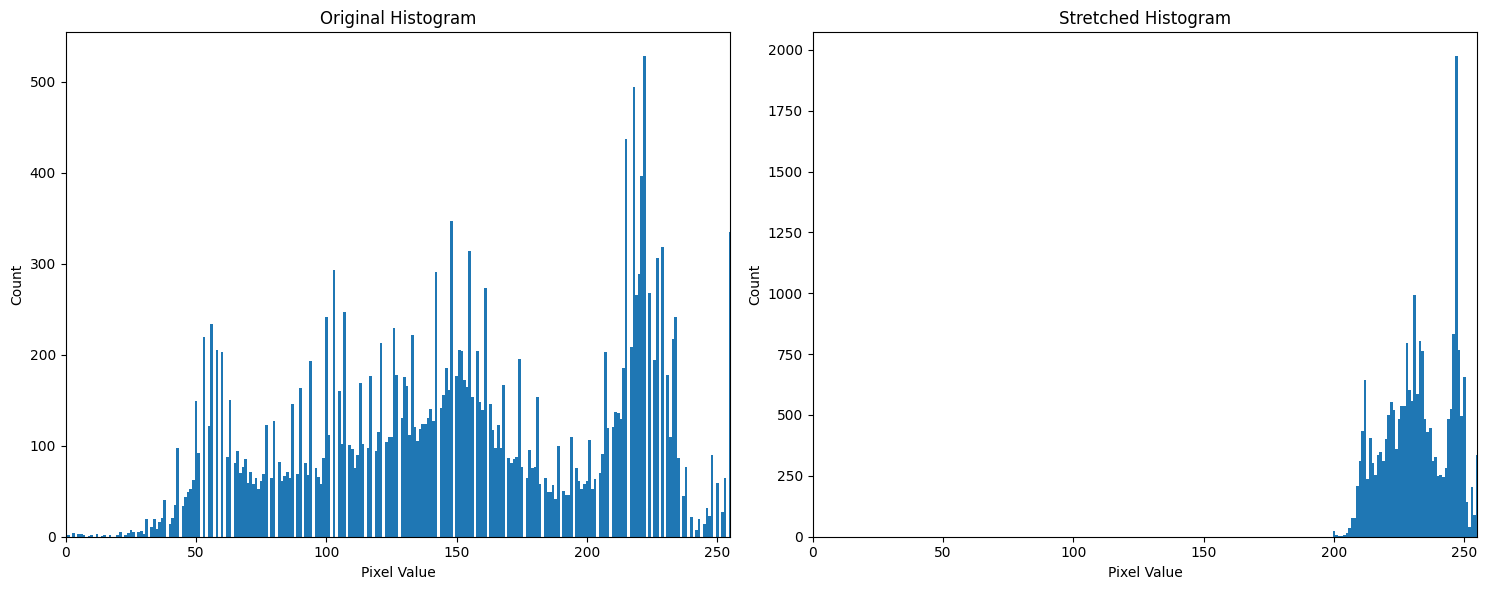

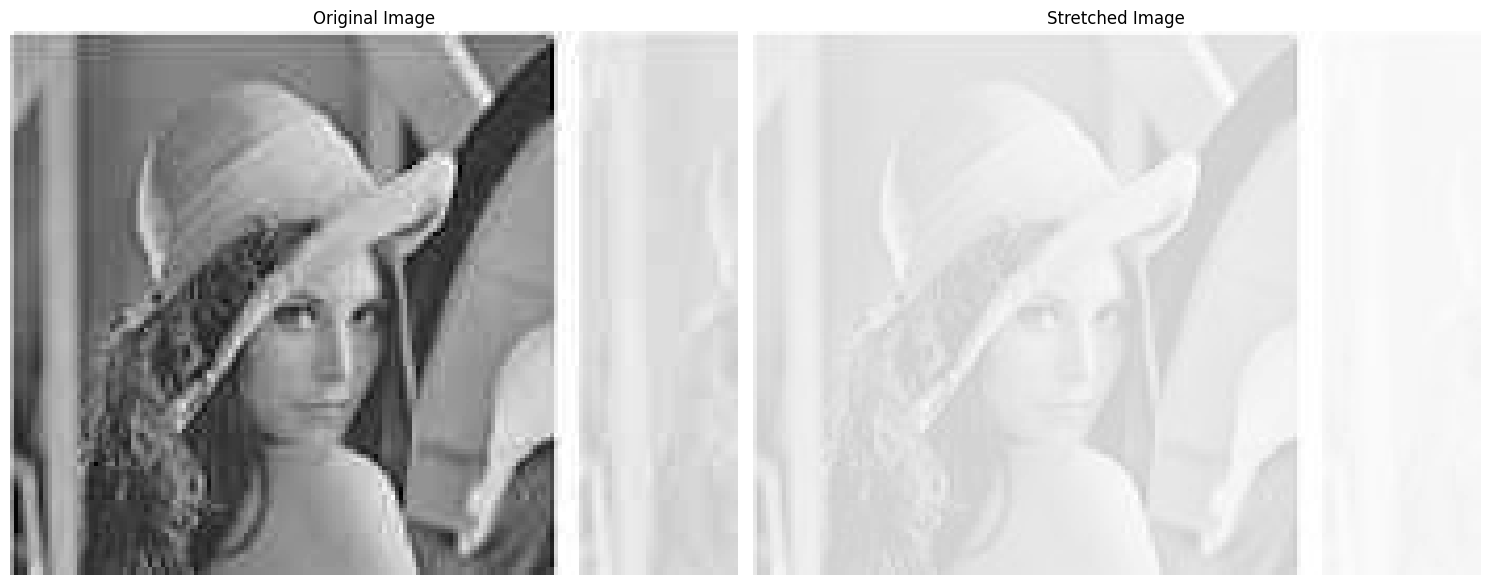

Processed image saved as stretched_lena_converted.bmp


In [ ]:
import os
import struct
import matplotlib.pyplot as plt

def read_image_manual(filename):
    with open(filename, 'rb') as f:

        header = f.read(54)
        if header[:2] != b'BM':
            raise ValueError("Not a valid BMP file")

        width = int.from_bytes(header[18:22], 'little')
        height = int.from_bytes(header[22:26], 'little')
        bits = int.from_bytes(header[28:30], 'little')
        offset = int.from_bytes(header[10:14], 'little')


        f.seek(offset)
        img = []
        row_size = width * (3 if bits == 24 else 1)
        padding = (4 - (row_size % 4)) % 4

        for _ in range(height):
            row = []
            data = f.read(row_size)
            if bits == 24:
                for i in range(width):
                    b, g, r = data[i*3:(i+1)*3]
                    gray = int(0.299*r + 0.587*g + 0.114*b)
                    row.append(gray)
            elif bits == 8:
                for byte in data:
                    row.append(byte)
            f.read(padding)
            img.insert(0, row)

    return img

def manual_histogram_stretch(img, new_min, new_max):

    min_val = min(min(row) for row in img)
    max_val = max(max(row) for row in img)


    stretched = []
    for row in img:
        new_row = []
        for pixel in row:
            if min_val == max_val:
                new_pixel = new_min
            else:
                new_pixel = int((pixel - min_val) * (new_max - new_min) / (max_val - min_val) + new_min)
            new_row.append(new_pixel)
        stretched.append(new_row)

    return stretched, min_val, max_val

def plot_histogram(data, title):
    hist = [0]*256
    for row in data:
        for pixel in row:
            hist[pixel] += 1

    plt.bar(range(256), hist, width=1.0)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.xlim([0, 255])

def process_image_manual(image_path):
    try:

        img = read_image_manual(image_path)


        unique_vals = len(set(pixel for row in img for pixel in row))
        min_val = min(min(row) for row in img)
        max_val = max(max(row) for row in img)

        print("\nImage Properties:")
        print(f"- Number of gray levels: {unique_vals}")
        print(f"- Minimum value: {min_val}")
        print(f"- Maximum value: {max_val}")


        while True:
            try:
                print("\nPlease enter new range:")
                new_min = int(input("New minimum (0-254): "))
                new_max = int(input("New maximum (1-255): "))

                if 0 <= new_min < new_max <= 255:
                    break
                print("Values must be between 0-255 and min < max!")
            except ValueError:
                print("Please enter only integers!")


        if min_val == max_val:
            print("Uniform image - stretching will have no effect")
            stretched_img = img
        else:
            stretched_img, _, _ = manual_histogram_stretch(img, new_min, new_max)


        new_min_val = min(min(row) for row in stretched_img)
        new_max_val = max(max(row) for row in stretched_img)
        print("\nProcessing Results:")
        print(f"- New minimum value: {new_min_val}")
        print(f"- New maximum value: {new_max_val}")


        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plot_histogram(img, 'Original Histogram')

        plt.subplot(1, 2, 2)
        plot_histogram(stretched_img, 'Stretched Histogram')
        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(stretched_img, cmap='gray', vmin=0, vmax=255)
        plt.title('Stretched Image')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        return stretched_img

    except Exception as e:
        print(f"Error processing image: {e}")
        return None


image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']
for filename in image_files:
    image_path = os.path.join('/content', filename)
    if not os.path.exists(image_path):
        print(f"File {filename} not found!")
        continue

    print(f"\n{'='*50}")
    print(f"Processing Image: {filename}")
    print(f"{'='*50}")

    result = process_image_manual(image_path)
    if result is not None:

        with open(f"stretched_{filename}", 'wb') as f:
            height = len(result)
            width = len(result[0]) if height > 0 else 0


            f.write(b'BM')
            file_size = 54 + width * height
            f.write(file_size.to_bytes(4, 'little'))
            f.write(b'\x00\x00\x00\x00')
            f.write((54).to_bytes(4, 'little'))
            f.write((40).to_bytes(4, 'little'))
            f.write(width.to_bytes(4, 'little'))
            f.write(height.to_bytes(4, 'little'))
            f.write((1).to_bytes(2, 'little'))
            f.write((8).to_bytes(2, 'little'))
            f.write((0).to_bytes(4, 'little'))
            f.write((width*height).to_bytes(4, 'little'))
            f.write((0).to_bytes(4, 'little'))
            f.write((0).to_bytes(4, 'little'))
            f.write((0).to_bytes(4, 'little'))
            f.write((0).to_bytes(4, 'little'))


            for i in range(256):
                f.write(bytes([i, i, i, 0]))


            for row in reversed(result):
                f.write(bytes(row))

        print(f"Processed image saved as stretched_{filename}")

plt.close('all')

# **د:تابع آماده**


Processing Image: cameraman.bmp

Image Properties:
- Number of gray levels: 254
- Minimum value: 0
- Maximum value: 254

Please enter new range:
New minimum (0-254): 10
New maximum (1-255): 150

Processing Results:
- New minimum value: 10
- New maximum value: 150


<ipython-input-9-d2c718118220>:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
<ipython-input-9-d2c718118220>:58: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(stretched_img.ravel(), 256, [0, 256])


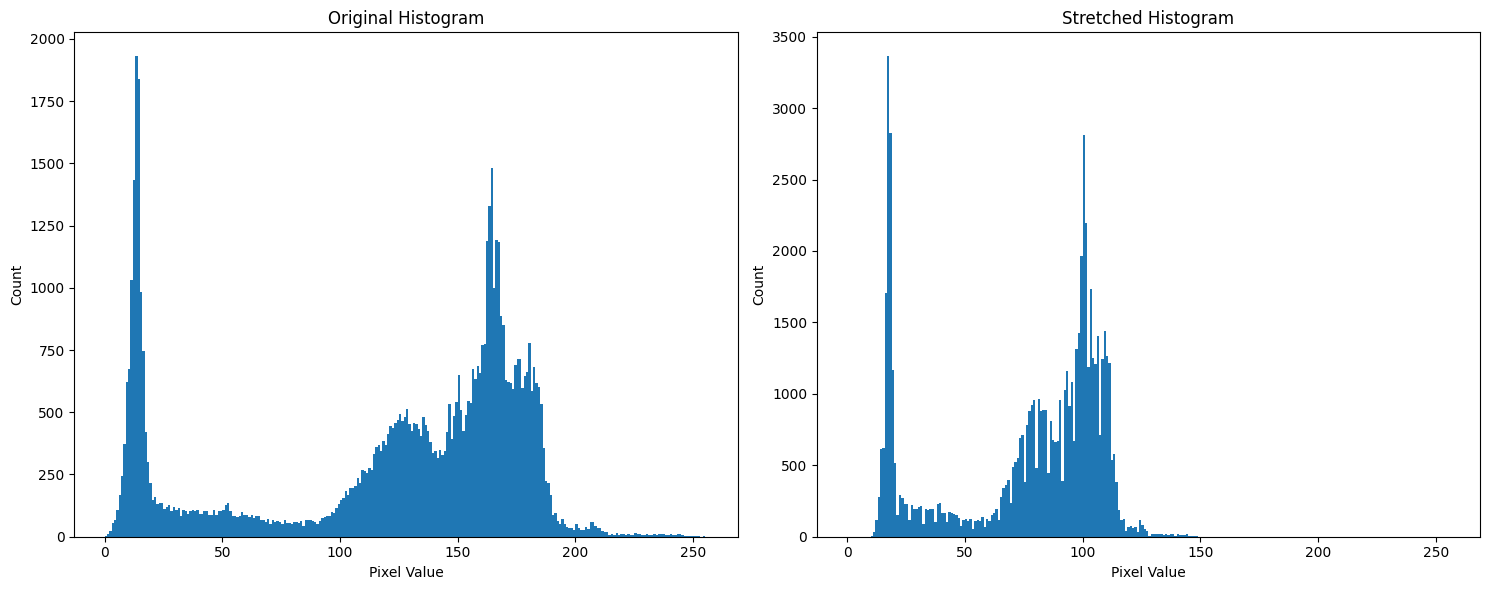

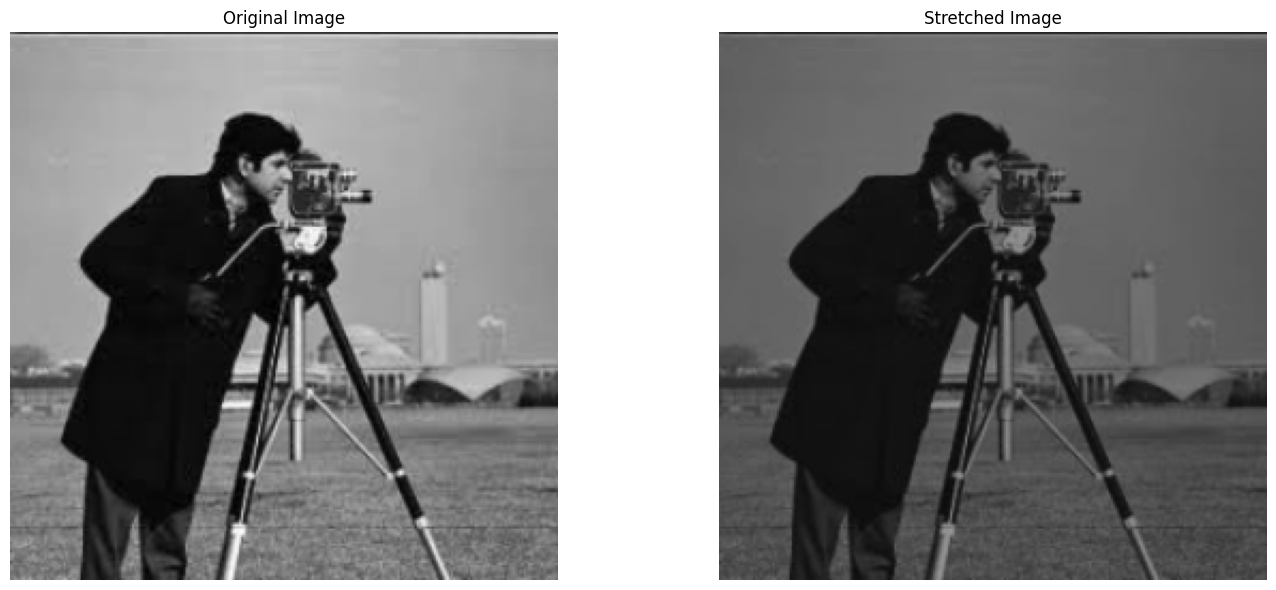

Processed image saved as stretched_cameraman.bmp

Processing Image: cat_bw.bmp

Image Properties:
- Number of gray levels: 249
- Minimum value: 5
- Maximum value: 253

Please enter new range:
New minimum (0-254): 100
New maximum (1-255): 255

Processing Results:
- New minimum value: 100
- New maximum value: 255


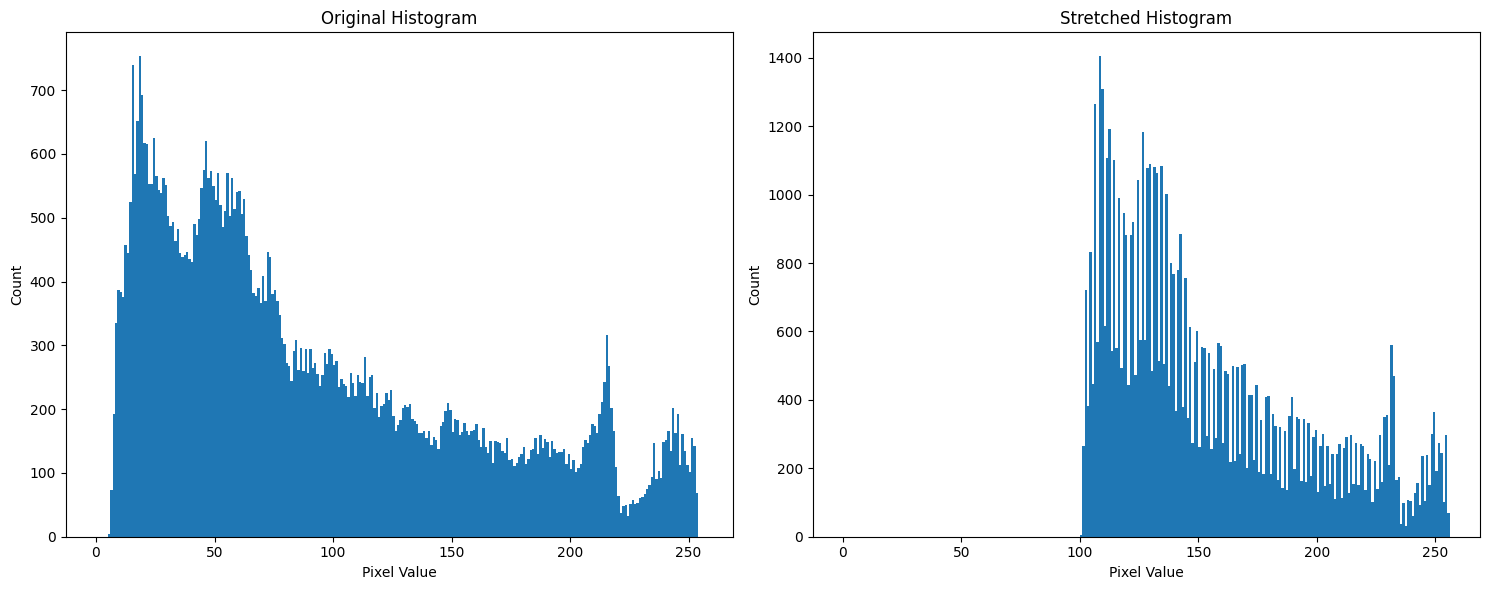

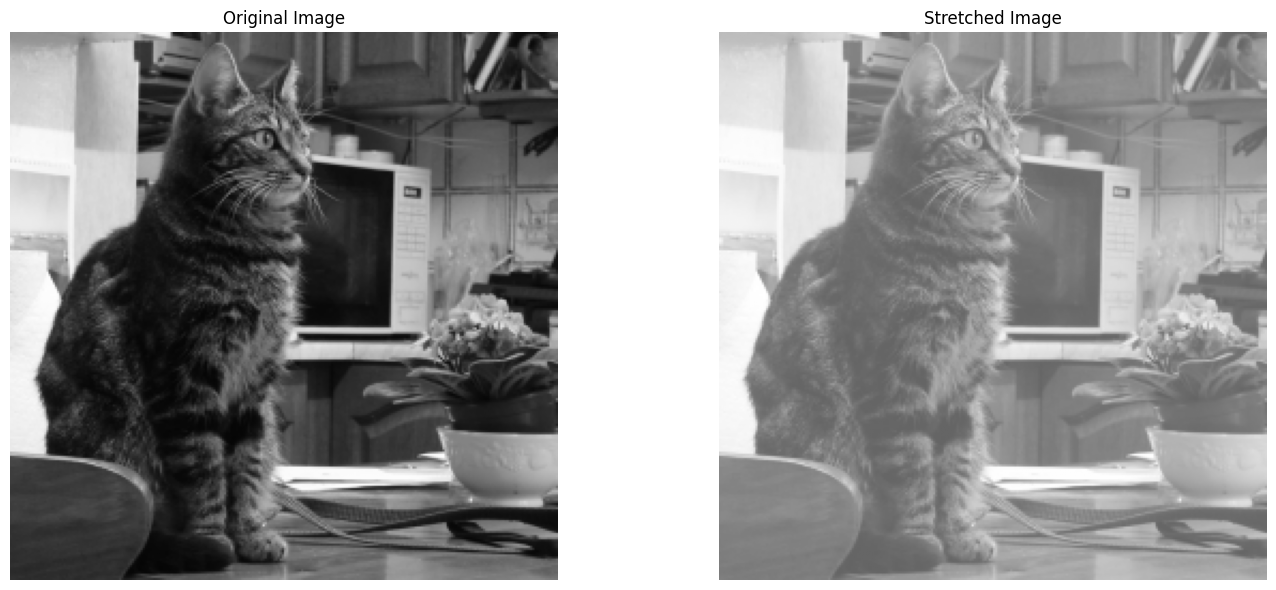

Processed image saved as stretched_cat_bw.bmp

Processing Image: circles.bmp

Image Properties:
- Number of gray levels: 2
- Minimum value: 0
- Maximum value: 255

Please enter new range:
New minimum (0-254): 50
New maximum (1-255): 200

Processing Results:
- New minimum value: 50
- New maximum value: 200


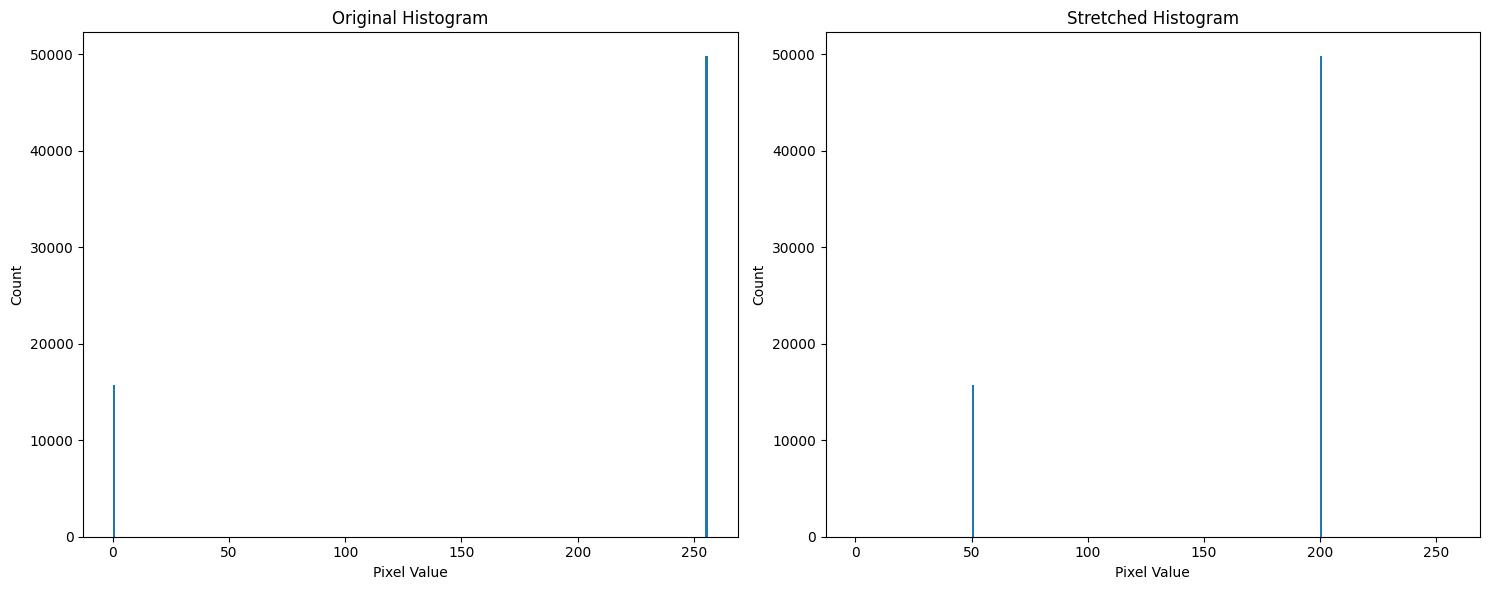

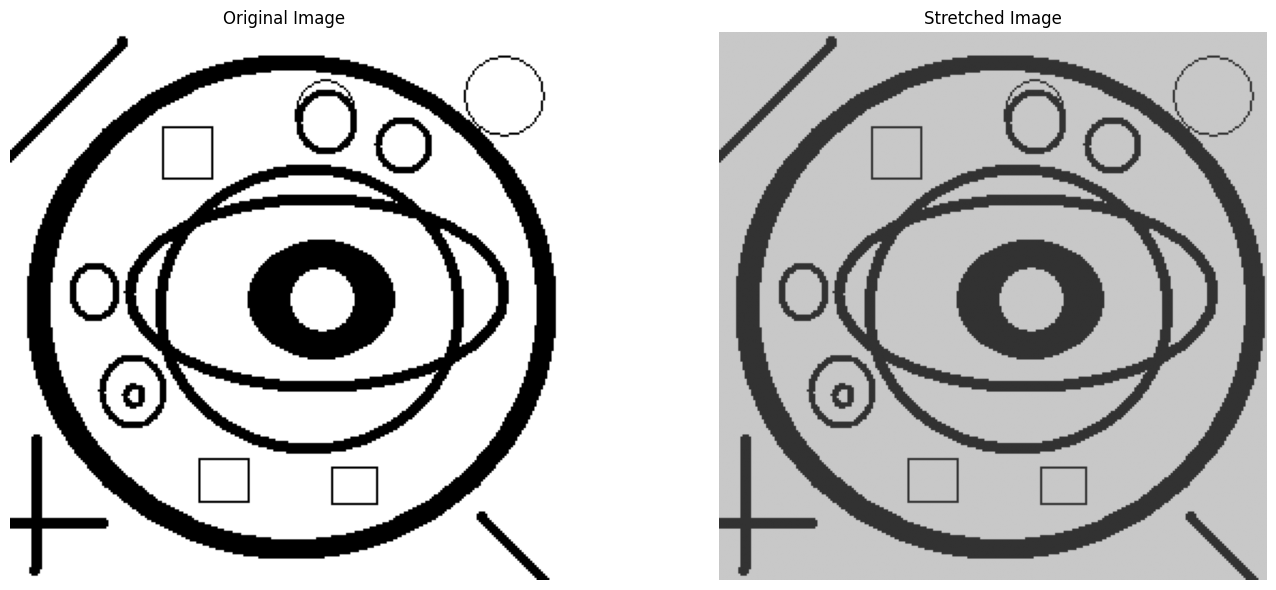

Processed image saved as stretched_circles.bmp

Processing Image: lena.bmp

Image Properties:
- Number of gray levels: 252
- Minimum value: 0
- Maximum value: 255

Please enter new range:
New minimum (0-254): 200
New maximum (1-255): 255

Processing Results:
- New minimum value: 200
- New maximum value: 255


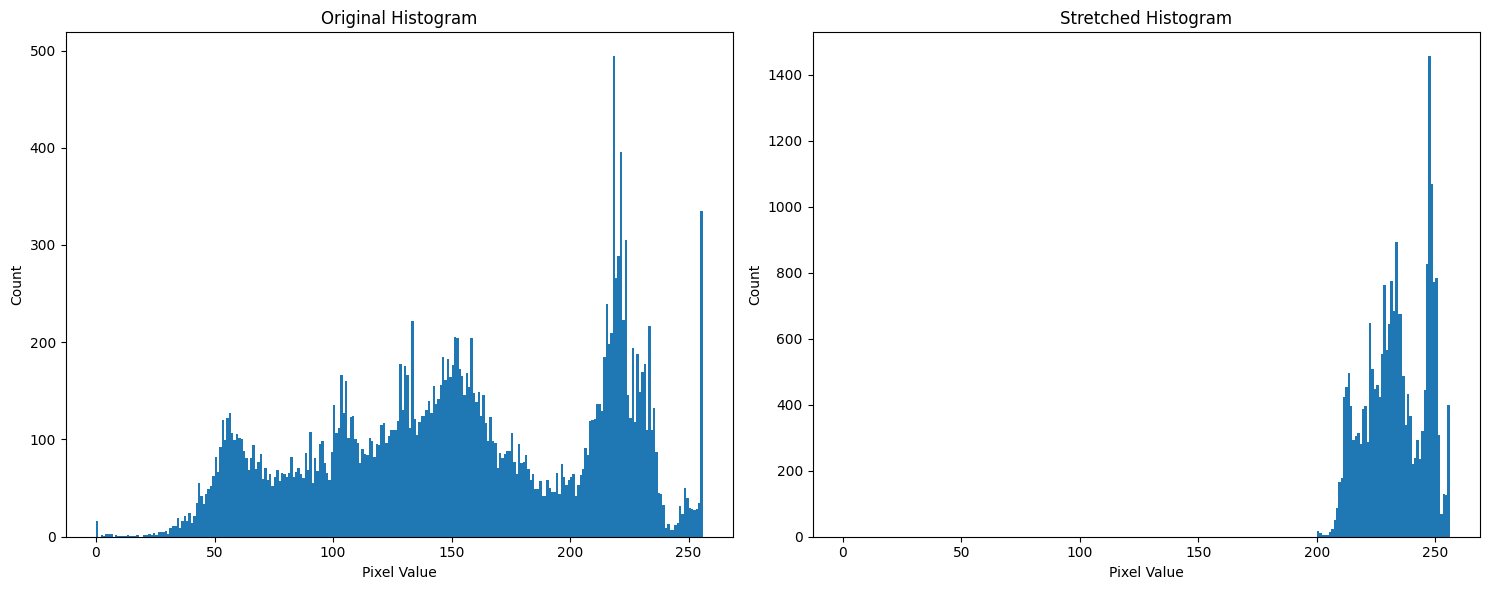

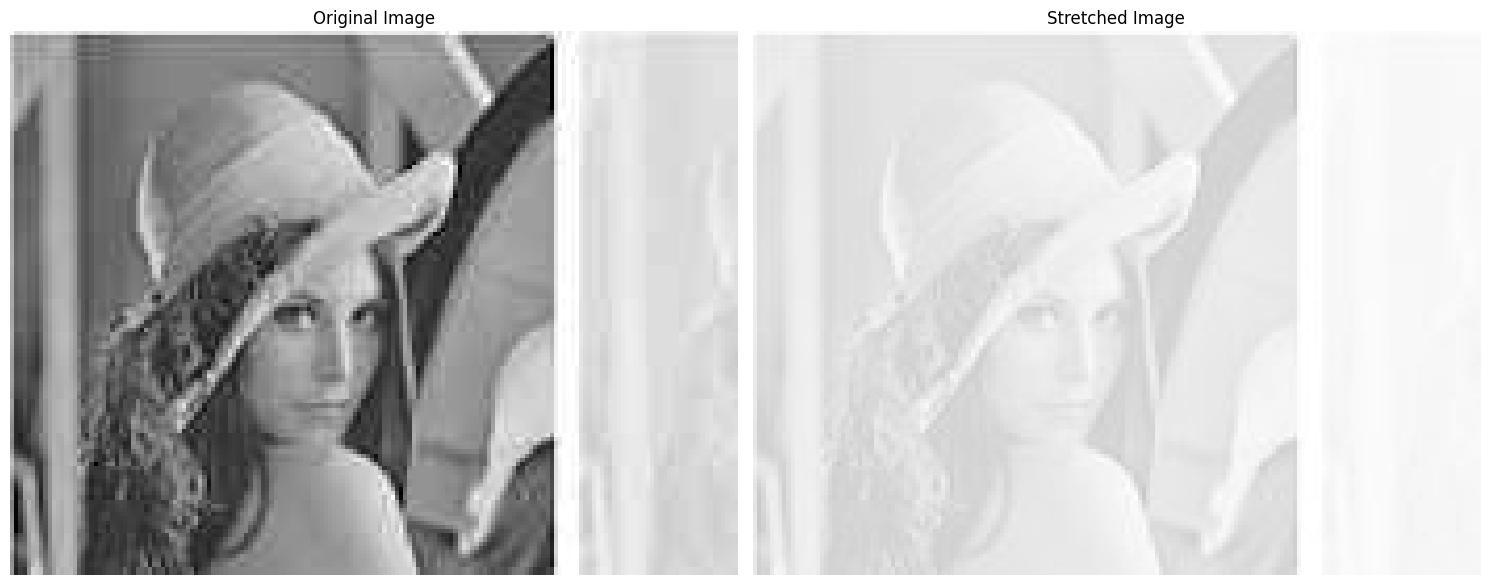

Processed image saved as stretched_lena.bmp


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def process_image_with_libs(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return None


    min_val = np.min(img)
    max_val = np.max(img)
    unique_vals = np.unique(img)
    num_levels = len(unique_vals)

    print("\nImage Properties:")
    print(f"- Number of gray levels: {num_levels}")
    print(f"- Minimum value: {min_val}")
    print(f"- Maximum value: {max_val}")


    while True:
        try:
            print("\nPlease enter new range:")
            new_min = int(input("New minimum (0-254): "))
            new_max = int(input("New maximum (1-255): "))

            if 0 <= new_min < new_max <= 255:
                break
            print("Values must be between 0-255 and min < max!")
        except ValueError:
            print("Please enter only integers!")


    if min_val == max_val:
        print("Uniform image - stretching will have no effect")
        stretched_img = img.copy()
    else:
        stretched_img = cv2.normalize(img, None, new_min, new_max, cv2.NORM_MINMAX)


    print("\nProcessing Results:")
    print(f"- New minimum value: {np.min(stretched_img)}")
    print(f"- New maximum value: {np.max(stretched_img)}")


    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(stretched_img.ravel(), 256, [0, 256])
    plt.title('Stretched Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(stretched_img, cmap='gray', vmin=0, vmax=255)
    plt.title('Stretched Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return stretched_img


image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena.bmp']
for filename in image_files:
    image_path = os.path.join('/content', filename)
    if not os.path.exists(image_path):
        print(f"File {filename} not found!")
        continue

    print(f"\n{'='*50}")
    print(f"Processing Image: {filename}")
    print(f"{'='*50}")

    result = process_image_with_libs(image_path)
    if result is not None:
        cv2.imwrite(f"stretched_{filename}", result)
        print(f"Processed image saved as stretched_{filename}")

plt.close('all')
cv2.destroyAllWindows()

# **ه:دستی**


##################################################
Processing cameraman.bmp
##################################################


<ipython-input-16-63af27183274>:51: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(flat_pixels, 256, [0, 256], color='blue')
<ipython-input-16-63af27183274>:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist([p for row in processed for p in row], 256, [0, 256], color='orange')


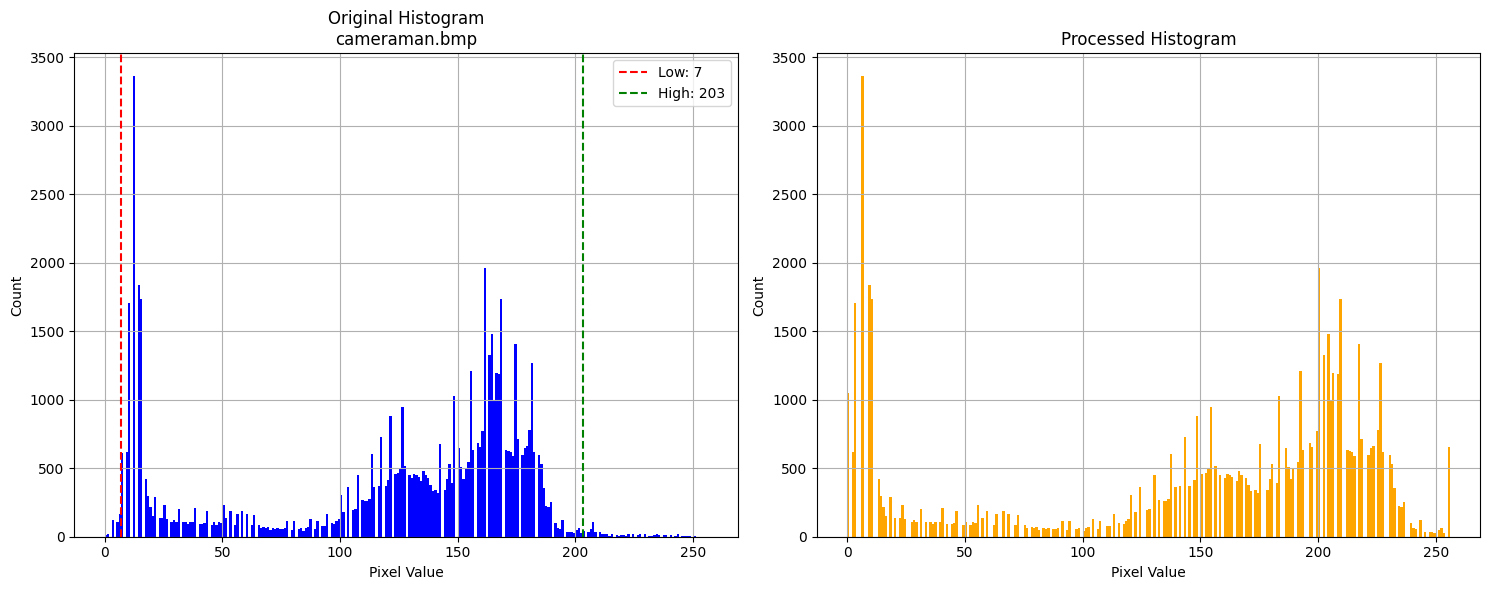

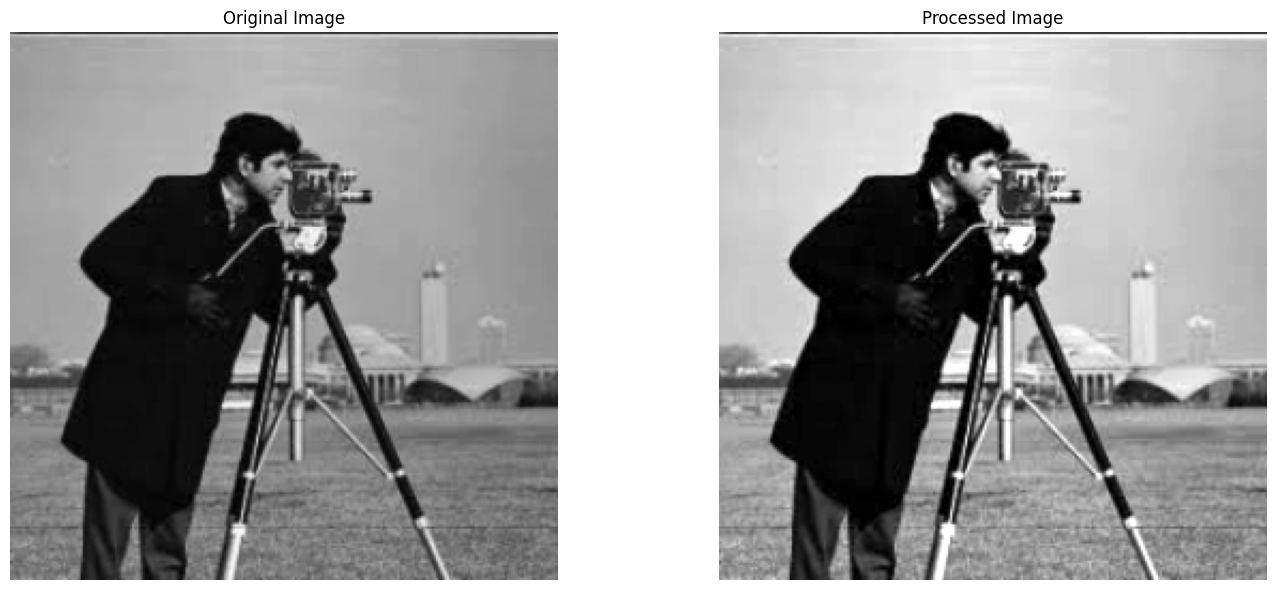


##################################################
Processing cat_bw.bmp
##################################################


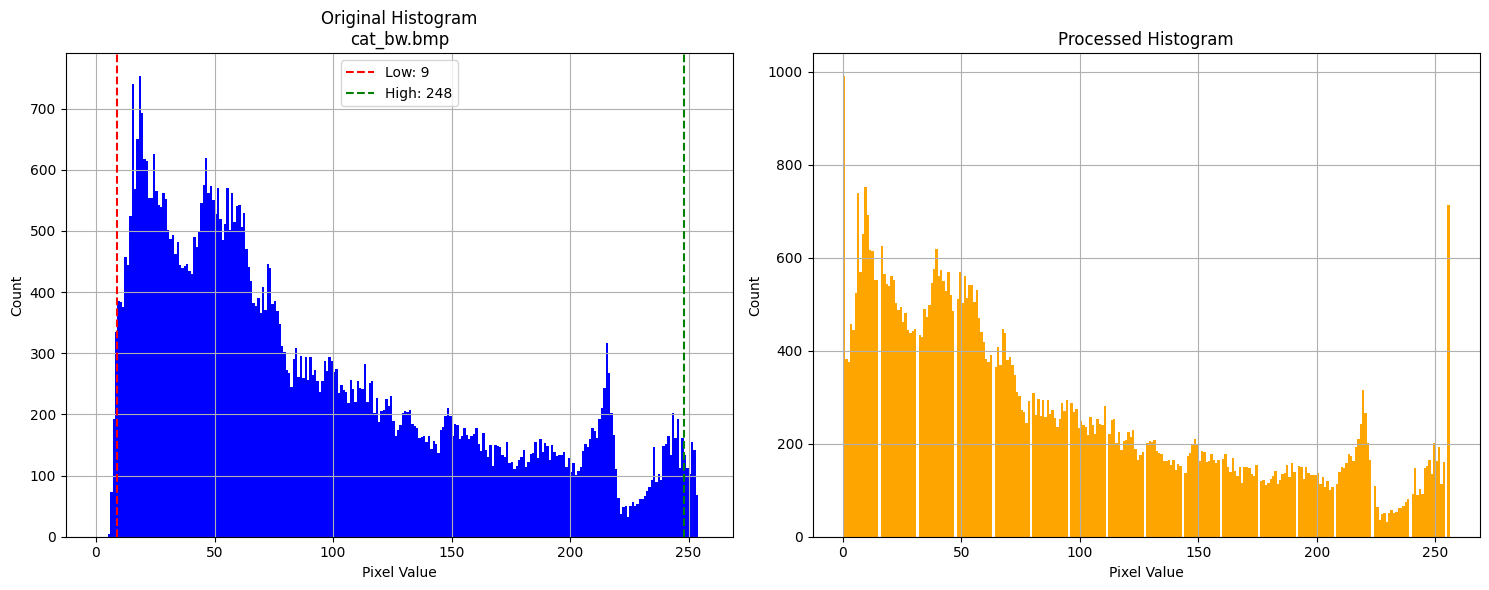

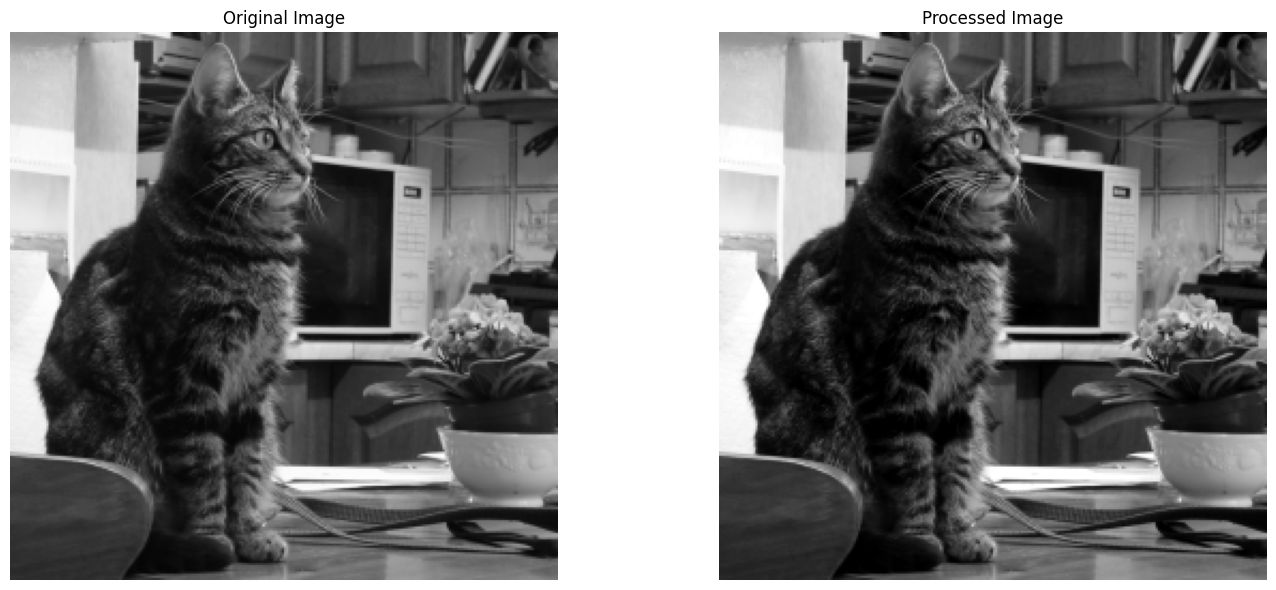


##################################################
Processing circles.bmp
##################################################


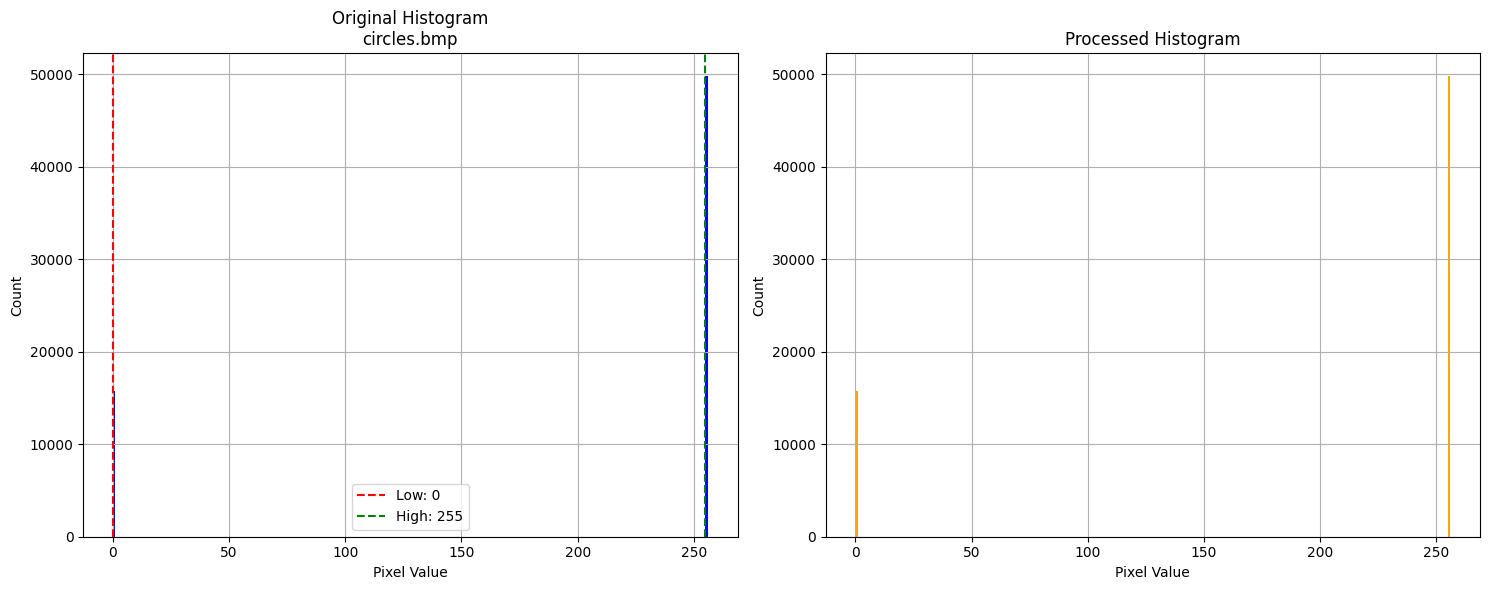

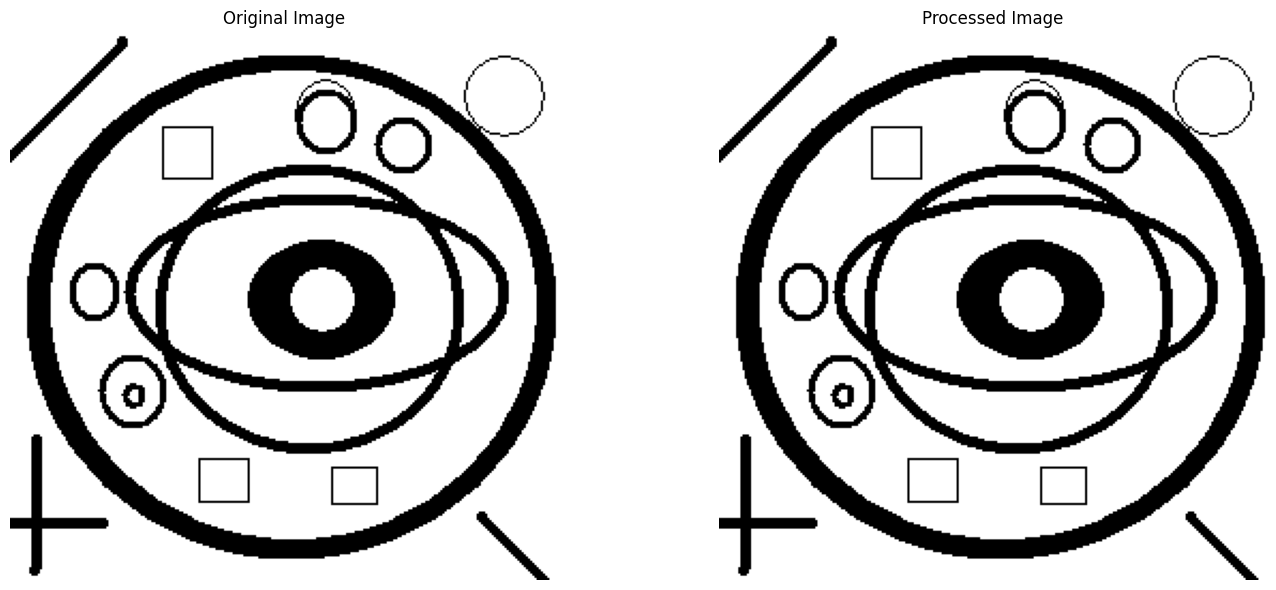


##################################################
Processing lena_converted.bmp
##################################################


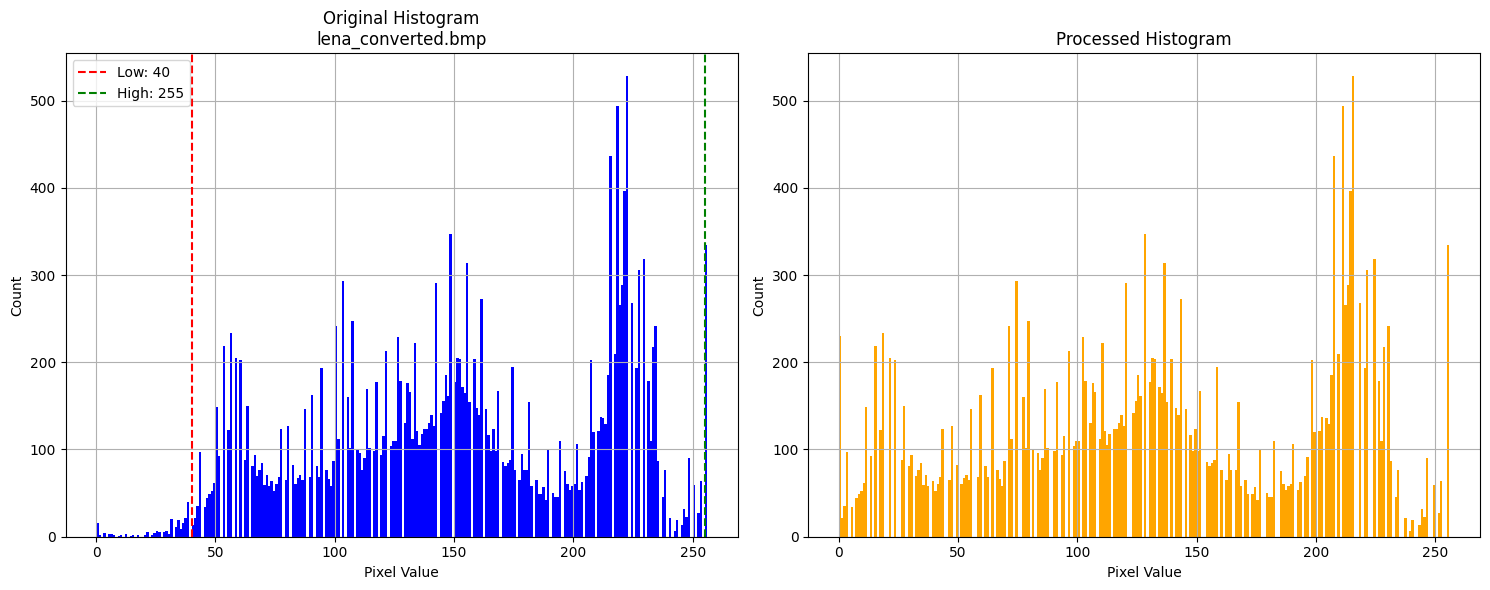

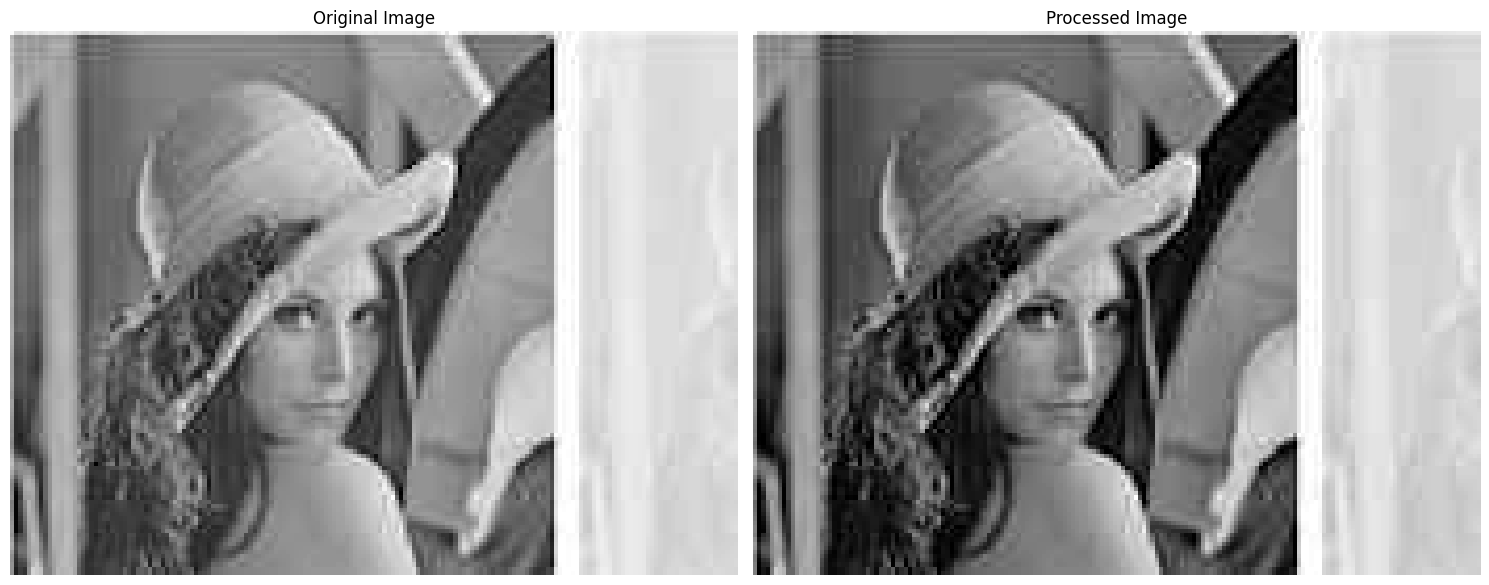

In [ ]:
import struct
import matplotlib.pyplot as plt
import os

def process_image_manual(image_path):
    try:
        if not os.path.exists(image_path):
            print(f"File {image_path} not found!")
            return


        pixels = read_bmp_manual(image_path)
        flat_pixels = [p for row in pixels for p in row]


        hist = manual_histogram(pixels)
        total = len(flat_pixels)
        cutoff = int(total * 0.01)


        low, high = 0, 255
        cum_sum = 0
        for i in range(256):
            cum_sum += hist[i]
            if cum_sum > cutoff:
                low = i
                break

        cum_sum = 0
        for i in reversed(range(256)):
            cum_sum += hist[i]
            if cum_sum > cutoff:
                high = i
                break


        processed = []
        for row in pixels:
            new_row = []
            for p in row:
                new_p = min(max(p, low), high)
                scaled = int((new_p - low) * 255 / (high - low)) if (high != low) else 0
                new_row.append(max(0, min(255, scaled)))
            processed.append(new_row)


        plt.figure(figsize=(15, 6), num=image_path)


        plt.subplot(1, 2, 1)
        plt.hist(flat_pixels, 256, [0, 256], color='blue')
        plt.axvline(low, color='red', linestyle='--', label=f'Low: {low}')
        plt.axvline(high, color='green', linestyle='--', label=f'High: {high}')
        plt.title(f'Original Histogram\n{os.path.basename(image_path)}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Count')
        plt.legend()
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.hist([p for row in processed for p in row], 256, [0, 256], color='orange')
        plt.title('Processed Histogram')
        plt.xlabel('Pixel Value')
        plt.ylabel('Count')
        plt.grid()

        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(15, 6), num=f"{image_path}_images")

        plt.subplot(1, 2, 1)
        plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(processed, cmap='gray', vmin=0, vmax=255)
        plt.title('Processed Image')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")


def read_bmp_manual(filename):
    with open(filename, 'rb') as f:
        header = f.read(54)
        if header[:2] != b'BM':
            raise ValueError("Invalid BMP file")

        width = struct.unpack('<I', header[18:22])[0]
        height = struct.unpack('<I', header[22:26])[0]
        bits = struct.unpack('<H', header[28:30])[0]
        offset = struct.unpack('<I', header[10:14])[0]

        f.seek(offset)
        pixels = []
        row_size = width * (3 if bits == 24 else 1)
        padding = (4 - (row_size % 4)) % 4

        for _ in range(height):
            row = []
            data = f.read(row_size)
            if bits == 24:
                for i in range(width):
                    b, g, r = data[i*3:(i+1)*3]
                    gray = int(0.299*r + 0.587*g + 0.114*b)
                    row.append(gray)
            elif bits == 8:
                row = list(data)
            f.read(padding)
            pixels.insert(0, row)

    return pixels

def manual_histogram(data):
    hist = [0]*256
    for row in data:
        for pixel in row:
            hist[pixel] += 1
    return hist


image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena_converted.bmp']

for file in image_files:
    print(f"\n{'#'*50}")
    print(f"Processing {file}")
    print(f"{'#'*50}")

    process_image_manual(file)
    plt.close('all')

# **ه:آماده**


##################################################
Processing cameraman.bmp
##################################################


<ipython-input-17-35efb13f7379>:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256], color='blue')
<ipython-input-17-35efb13f7379>:41: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(normalized_img.ravel(), 256, [0, 256], color='orange')


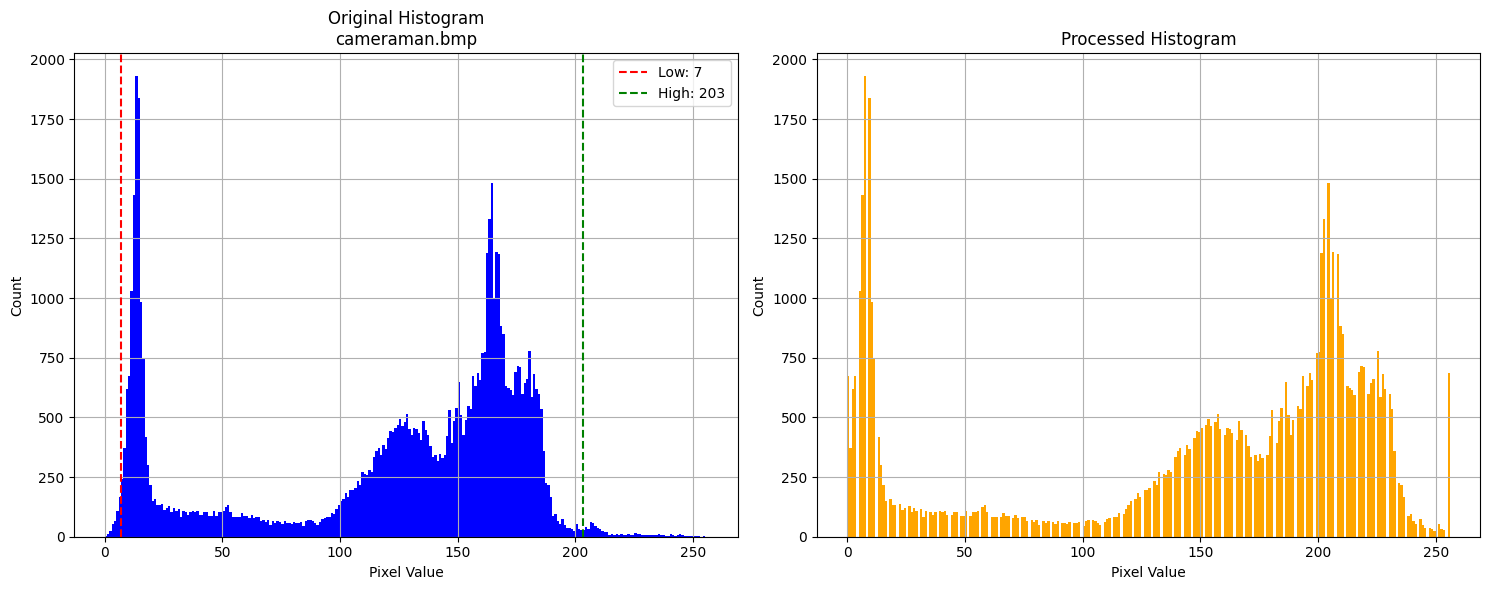

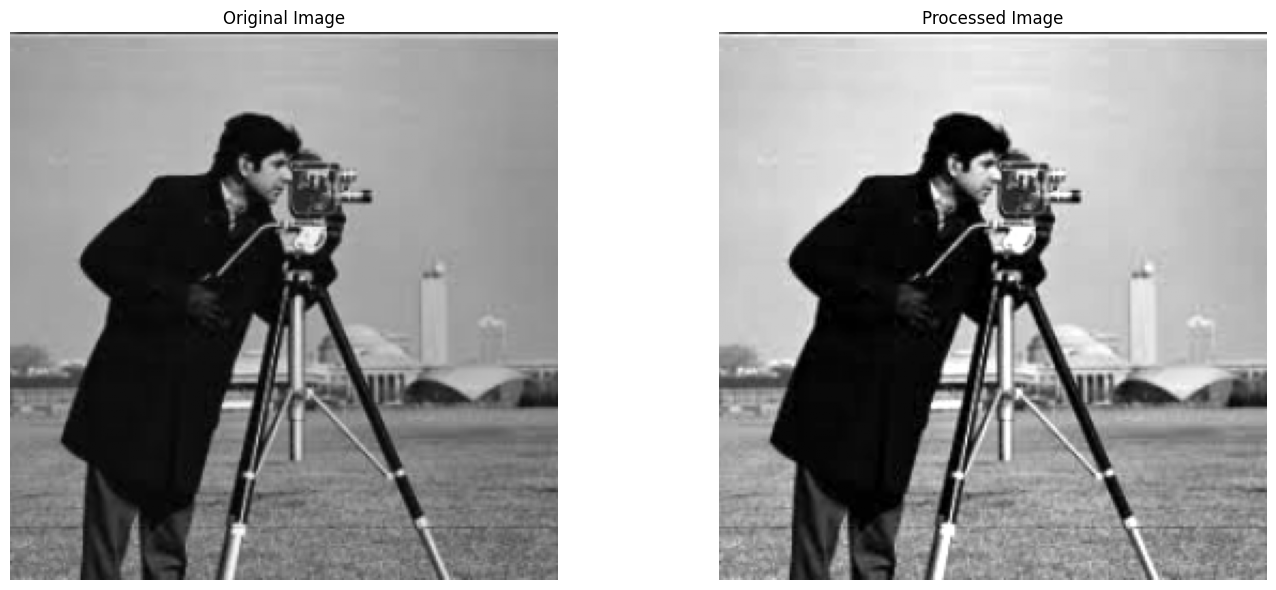


##################################################
Processing cat_bw.bmp
##################################################


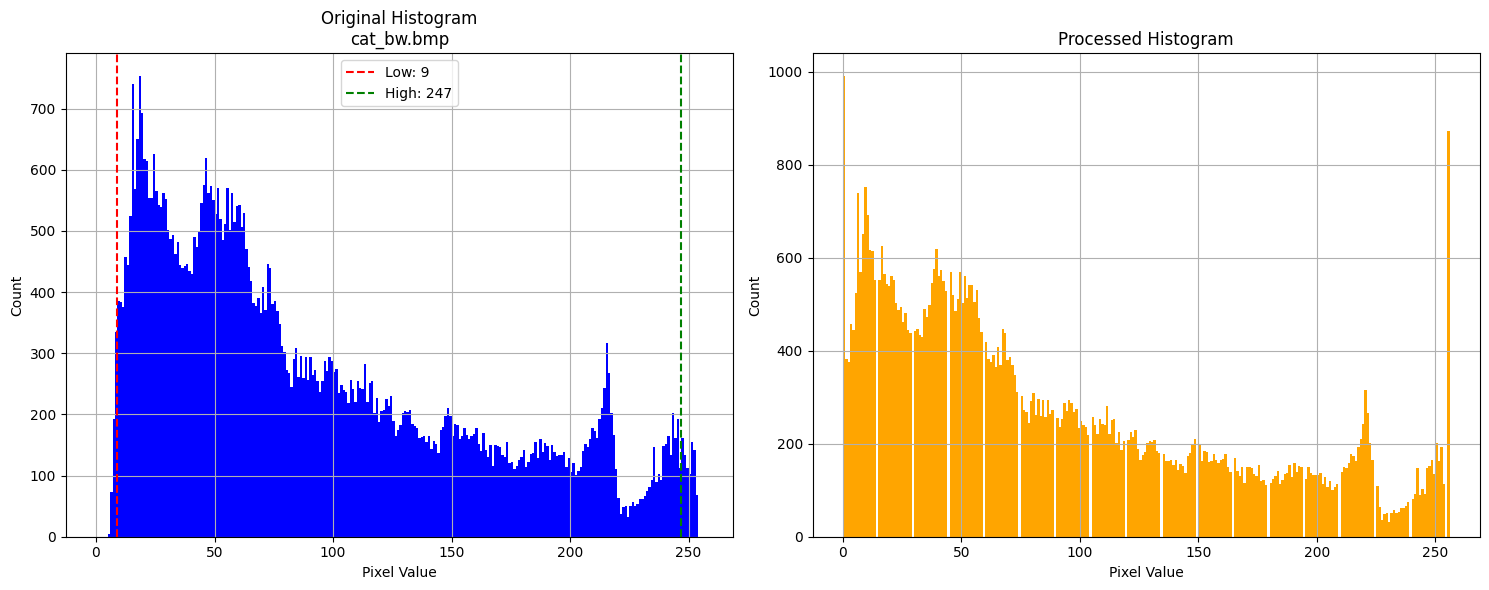

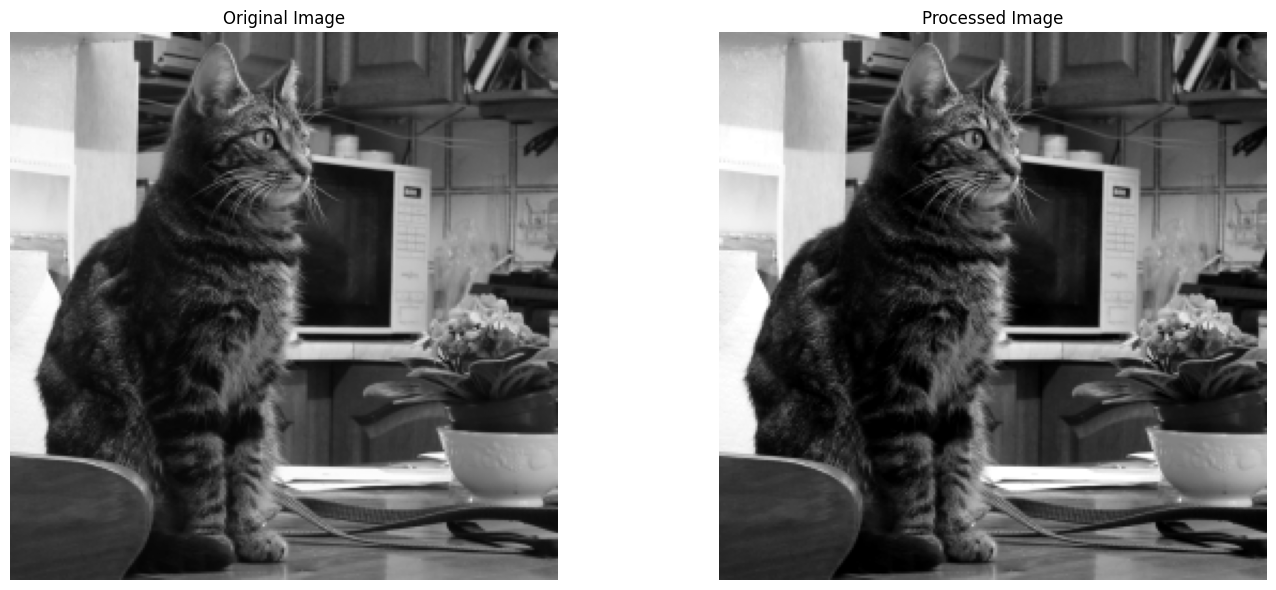


##################################################
Processing circles.bmp
##################################################


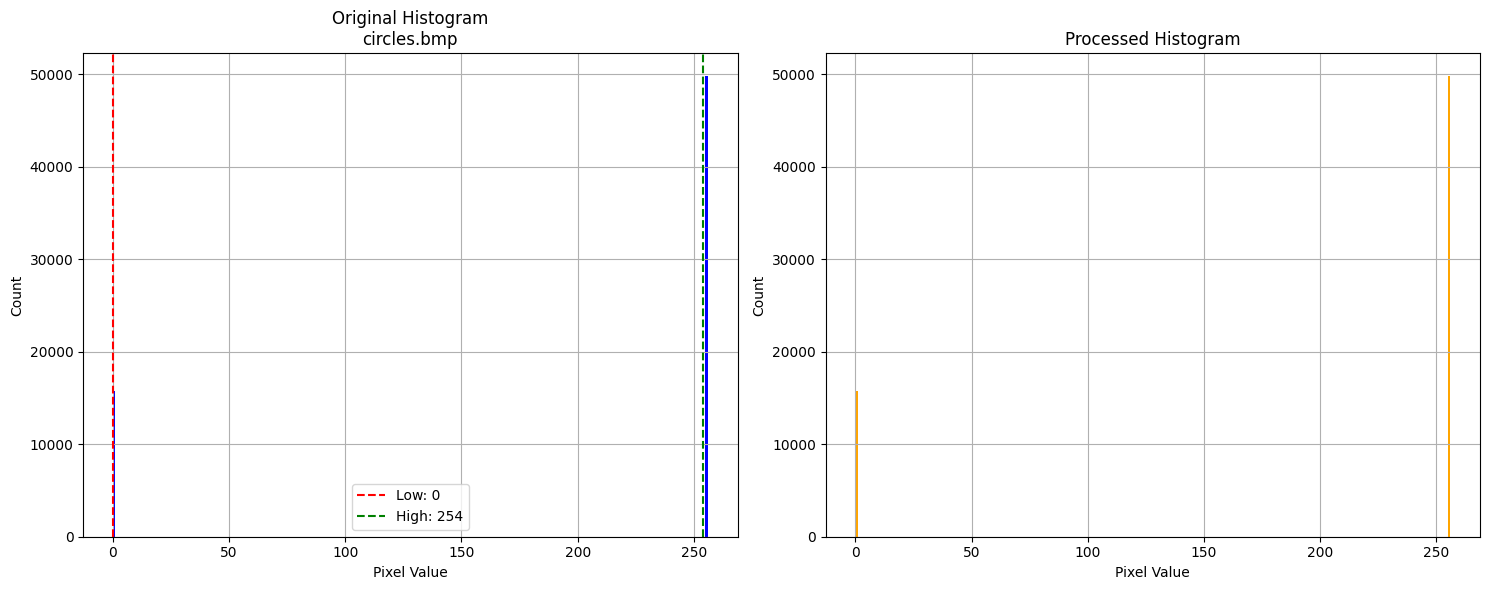

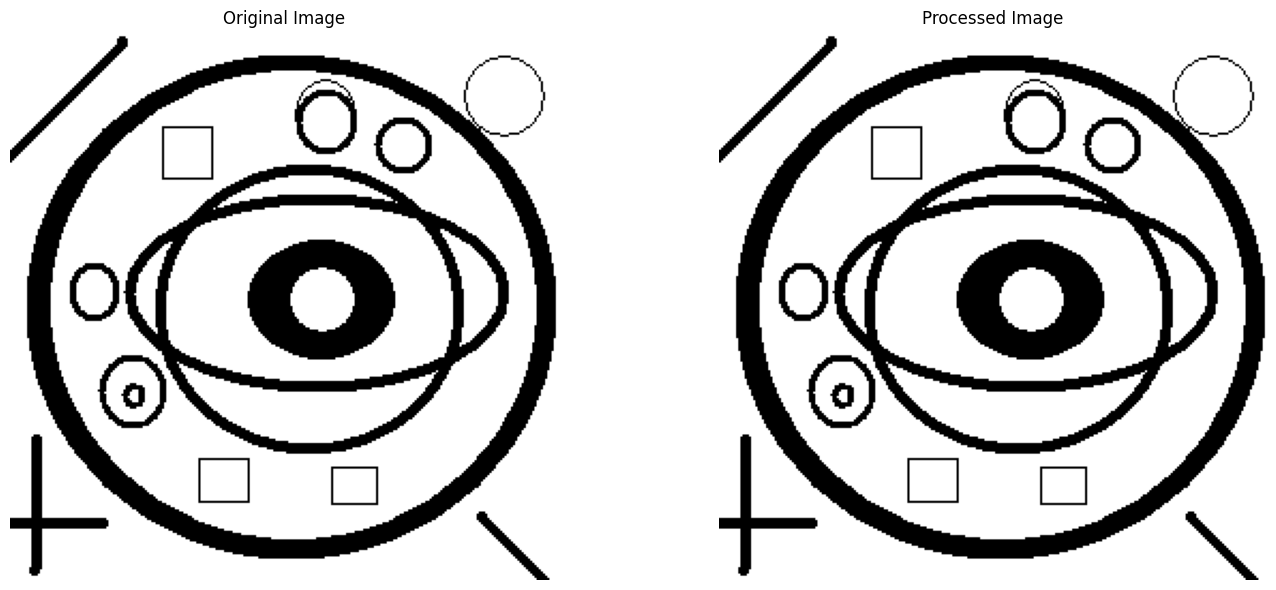


##################################################
Processing lena.bmp
##################################################


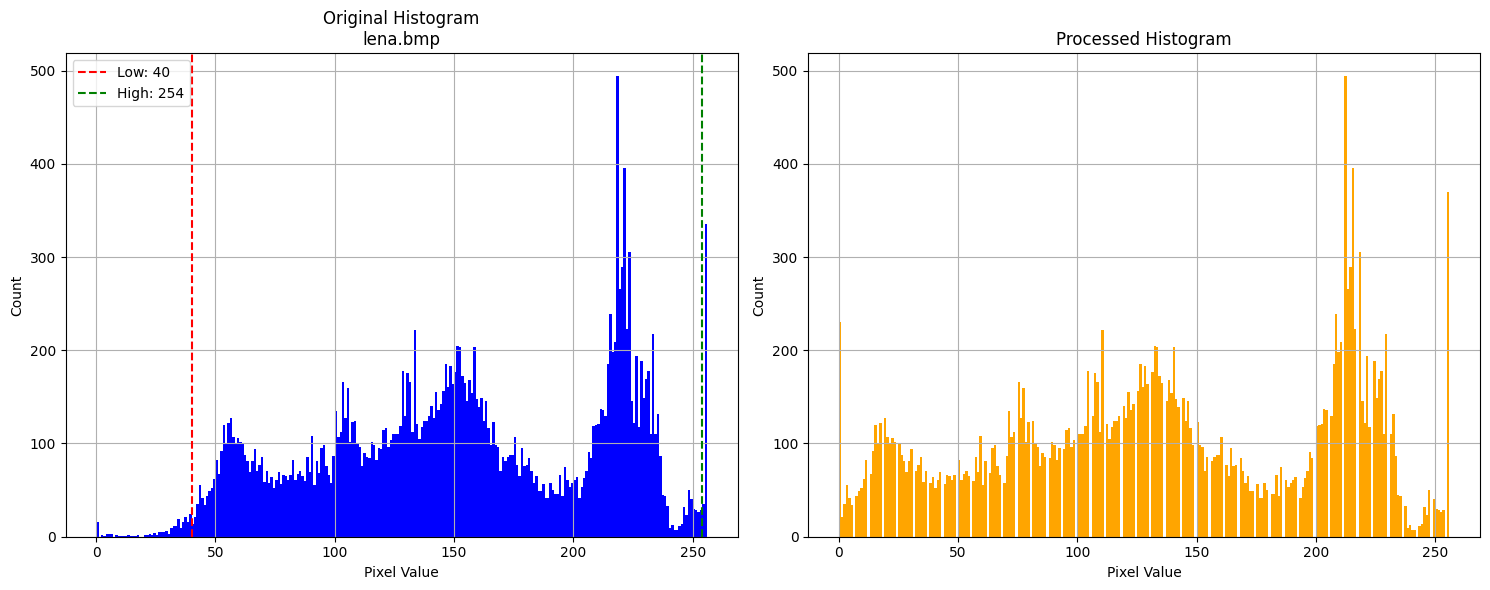

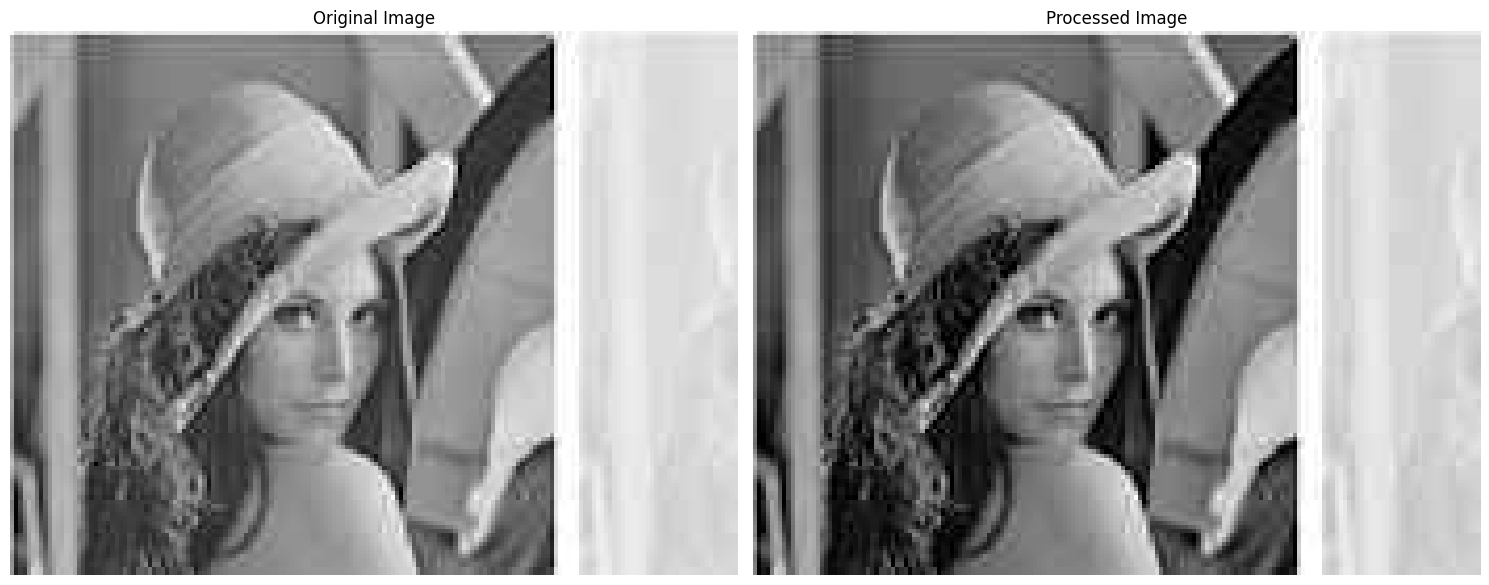

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def process_image_lib(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return


    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    total_pixels = img.size
    cutoff = int(total_pixels * 0.01)

    cum_hist = np.cumsum(hist)
    low = np.where(cum_hist > cutoff)[0][0]
    high = np.where(cum_hist < (total_pixels - cutoff))[0][-1]


    clipped_img = np.clip(img, low, high)
    normalized_img = ((clipped_img.astype(np.float32) - low) * 255 / (high - low)).astype(np.uint8)


    plt.figure(figsize=(15, 6), num=image_path)


    plt.subplot(1, 2, 1)
    plt.hist(img.ravel(), 256, [0, 256], color='blue')
    plt.axvline(low, color='red', linestyle='--', label=f'Low: {low}')
    plt.axvline(high, color='green', linestyle='--', label=f'High: {high}')
    plt.title(f'Original Histogram\n{os.path.basename(image_path)}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(normalized_img.ravel(), 256, [0, 256], color='orange')
    plt.title('Processed Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.grid()

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(15, 6), num=f"{image_path}_images")

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_img, cmap='gray', vmin=0, vmax=255)
    plt.title('Processed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


image_files = ['cameraman.bmp', 'cat_bw.bmp', 'circles.bmp', 'lena.bmp']

for file in image_files:
    if not os.path.exists(file):
        print(f"File {file} not found!")
        continue

    print(f"\n{'#'*50}")
    print(f"Processing {file}")
    print(f"{'#'*50}")

    process_image_lib(file)
    plt.close('all')

# **و:آماده**

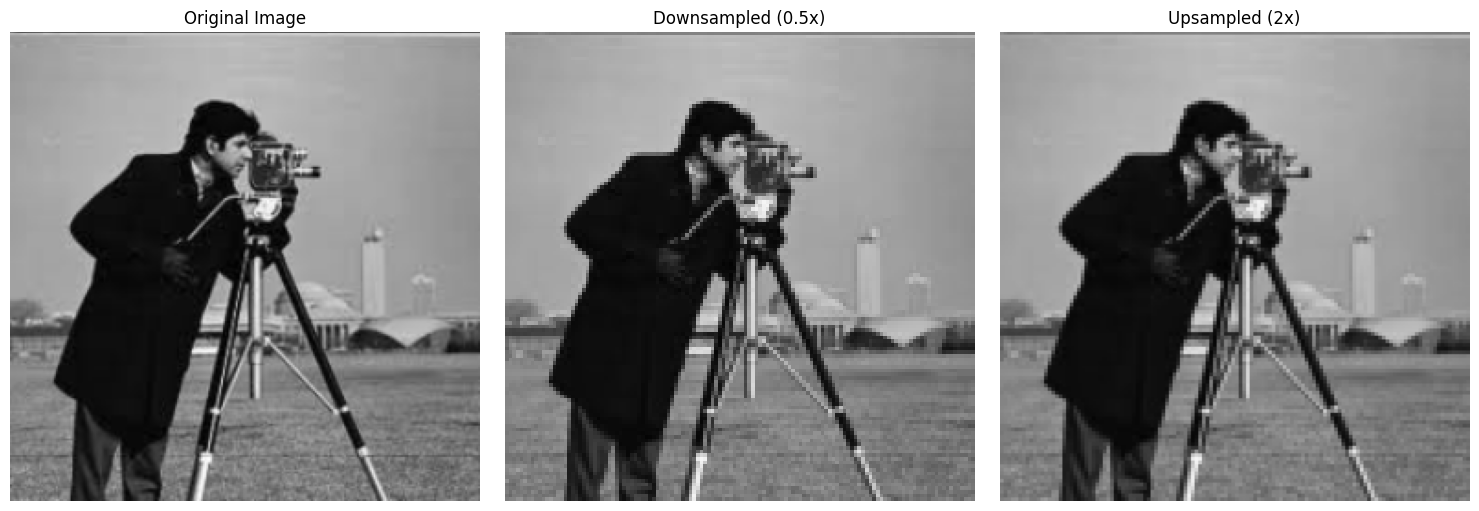

Images saved successfully


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_with_libs(image_path):

    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found!")
        return


    small_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    big_img = cv2.resize(small_img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)


    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB))
    plt.title('Downsampled (0.5x)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(big_img, cv2.COLOR_BGR2RGB))
    plt.title('Upsampled (2x)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    cv2.imwrite('downsampled.jpg', small_img)
    cv2.imwrite('upsampled.jpg', big_img)
    print("Images saved successfully")

resize_with_libs('cameraman.bmp')

# **و:دستی**

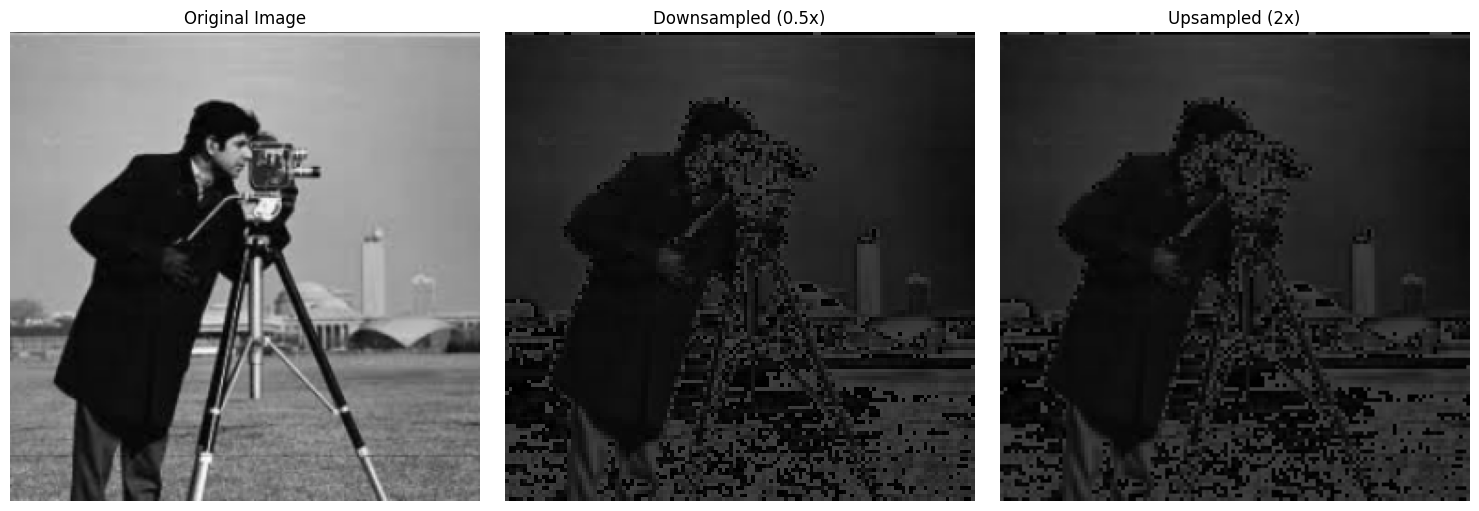

Images saved successfully


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def manual_resize(image_path):

    with open(image_path, 'rb') as f:
        header = f.read(54)
        if header[:2] != b'BM':
            raise ValueError("Invalid BMP file")

        width = int.from_bytes(header[18:22], 'little')
        height = int.from_bytes(header[22:26], 'little')
        offset = int.from_bytes(header[10:14], 'little')

        f.seek(offset)
        pixels = []
        row_size = width * 3
        padding = (4 - (row_size % 4)) % 4

        for _ in range(height):
            row = []
            data = f.read(row_size)
            for i in range(0, row_size, 3):
                row.append((data[i+2], data[i+1], data[i]))
            f.read(padding)
            pixels.insert(0, row)


    img = np.array(pixels, dtype=np.uint8)

    def downsample(img):
        h, w = img.shape[:2]
        h = h - h % 2
        w = w - w % 2
        img = img[:h, :w]
        return (img[::2, ::2] + img[1::2, ::2] + img[::2, 1::2] + img[1::2, 1::2]) // 4

    def upsample(img):
        return img.repeat(2, axis=0).repeat(2, axis=1)


    small_img = downsample(img)
    big_img = upsample(small_img)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(small_img)
    plt.title('Downsampled (0.5x)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(big_img)
    plt.title('Upsampled (2x)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    from PIL import Image
    Image.fromarray(img).save('original.png')
    Image.fromarray(small_img).save('manual_downsampled.png')
    Image.fromarray(big_img).save('manual_upsampled.png')
    print("Images saved successfully")

manual_resize('cameraman.bmp')